# fit1T バッチ処理用　2022.03.18

In [2]:
import sys,os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'
import numpy as np
import matplotlib.pyplot as plt
import cv2
import wandb
import optuna
# from sympy import *
from sympy import diff,Symbol,Matrix,symbols,solve,simplify,binomial,lambdify,poly
from sympy.abc import a,b,c
# init_session()
from sympy import var
# px,py =var('px:4'),var('py:4')
from statistics import mean
import datetime
import time
datetime.datetime.now()

# Google Colaboratory の MyDrive パス
COLABRDROOT = "/content/drive/MyDrive/RadiShLab"

# ホーム
LOCALHOME = "."  # フォルダを絶対指定するならここを書き変えてください

# 環境判定（Google Colaboratory かどうかの判定）
try:
    from google.colab import drive
    drive.mount('/content/drive')
    sys.path.append(COLABRDROOT+'/rdlib')
    COLABORATORY = True
except ImportError:
    sys.path.append('./rdlib')
    COLABORATORY = False
import rdexper as rd

# フォルダ指定
labhome = COLABRDROOT if COLABORATORY else LOCALHOME

NSilF = labhome+'/RDSamples/NSilImages' # 正規化されたシルエット画像のフォルダ
imgs = rd.collectimages(NSilF)       # シルエット画像のリスト

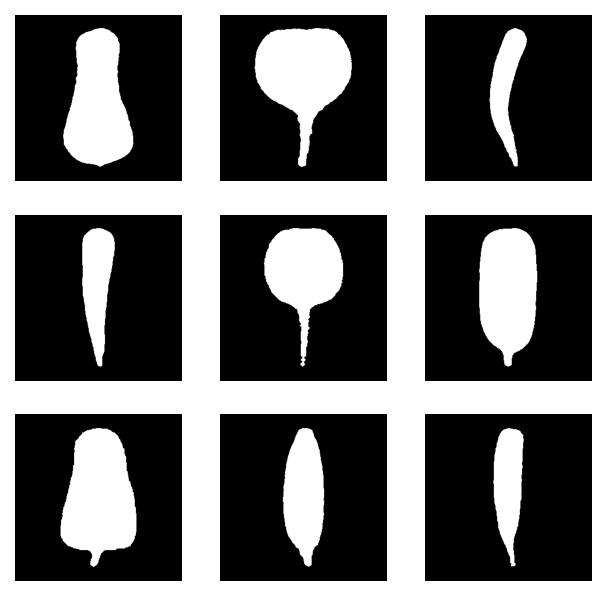

In [3]:
NSilF = labhome+'/RDSamples/NSilImages' # 正規化されたシルエット画像のフォルダ
imgs = rd.collectimages(NSilF)       # シルエット画像のリスト
#imgs = collectimages(NSilF)       # シルエット画像のリスト
plt.figure(figsize=(5,5),dpi=150)
for i in range(9):
  rd.plotimg(imgs[i],330+i+1)
  #plotimg(imgs[i],330+i+1)

In [4]:
import time
def check1(imgnum,test='dummy',coe=0,Nsamples=65,N=7,itt=3,maxTry=1500,pat=10,err_th=0.75,threstune=1.0,wandb=None,withEC=False,trial=None):
    start = time.time()
    rd.BezierCurve.mloop_itt = itt
    if wandb:
      config = wandb.config={
          'program':'check1',
          'N':N,
          test:coe,
          'mloop_itt':itt,
          'maxTry':maxTry,
          'pat':pat,
          'err_th':err_th}
      #調整するパラメータを登録
      wandb.init(project="fit1t %d" % (imgnum),
                 config = config)
      wandb.run.name = "%d-%12.8f"%(imgnum,coe)
    rd.BezierCurve.wandb=wandb
    # rd.BezierCurve.eq_coe = coe
    img = imgs[imgnum]
    conAll = rd.getCntPairWithImg(img, mode=1) # 全周輪郭を得る
    Samples = rd.getSamples(conAll,N=Nsamples,mode='Equidistant')
    bez = rd.BezierCurve(N=N,samples=Samples) # インスタンス生成
    bestcps, bestfunc, minerror = bez.fit1(maxTry=maxTry,withErr=True, withEC=withEC,tpara=[], pat=pat, err_th=err_th, threstune=threstune,moption=True)
    rd.drawBez(img,stt=-0.00,end=1.00,bezL=bestfunc,cntL=Samples)
    elapsed_time = time.time() - start
    print(bestfunc)
    if withEC:
        (error,trynum) = minerror
        return error,elapsed_time,trynum  
    else:
        return minerror,elapsed_time

wandb でクラウド保存するバージョンです。詳細は省略

# fit1T mode 0

In [ ]:
#### rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 30000 
Ims =[3,4,5,7]
Ns =[10,11,9,7]
erth = [0.5,0.5,0.5,0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1(Ims[i],test='fit1Tmode0',mode=0,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,maxTry=3000,pat=1000,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

2022-02-16 21:47:13.733621


wandb: Currently logged in as: aquapathos (use `wandb login --relogin` to force relogin)


^^^^^^^^^.^.^.^..
CP 5.0, steps:16, etime: 7.36023 err: 4.4827218514
^.^^.^..^..........................................................................
............................................................................^^^^^^^^^^^^^...........
............................^^^^^^^^^^^^^^^.
CP 2.0, steps:243, etime: 47.27126 err: 1.9571704209
.^^..........^^^^^^^^^^^.^^.^^^^^^^^^^^^^^...^^^^.......
..............^^^^^^^^^^^^^^....^^^^...........^^^^^^^^^^^^^^^^^^^^^^.....^^^^...................^^^
^^^^^^^^^......^^...................^^^^^^^^^^^^^^^.^.^.^.^.........................................
...............^^^^^^^^^^.^^^^^^.^.^..^.^..................
CP 1.0, steps:558, etime: 102.62789 err: 0.9996051618
................................^^^^^^^^^
^^^^^^.^^^^^^...^.^.^.^.^.^.^.^.^.^.^.^.^.^.^.^.^.^..^.^.^.^.^.^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^.^^^.^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

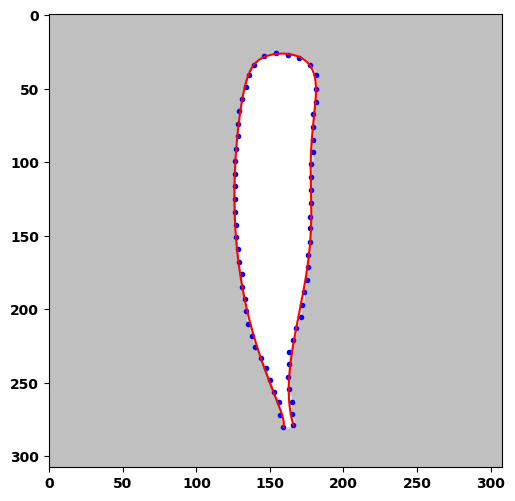

In [5]:
#### rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 30000 
Ims =[8]
Ns =[9]
erth = [0.5,0.5,0.5,0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode0',mode=0,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=3000,pat=2000,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

2022-02-16 16:27:41.737097


loss,█▇▇▆▅▅▅▄▄▄▄▄▅▄▄▅▄▄▅▅▄▄▃▂▂▃▄▂▃▃▃▂▂▂▁▄▁▁▂▂
loss,1.92761


^^^^^^^^^.^.^..^.
CP 5.0, steps:16, etime: 4.09656 err: 4.8899487018
^.^..^^.^..^.......................................................................
.............................^^^^^^^^.^^.^.................................................^^^^.^^.^
^.^^.^^.......
CP 2.0, steps:213, etime: 39.08045 err: 1.9992827250
................................................^^^^^^^^^^^^^.^^^....^................
...........................^^^^^^^^^^^^.^^^^...^.^...............................................^^^
^^^^^^^^^^^^^.^.^^^^^^^^^^^^^.....^^^^^....................^^^^^^^^^^^^^^......^^^..................
..^^^^^^^^^^^^^^.^^^^^^^.^^.^^.............^^^^^^^^^...................^^^^^^^^^^^^^^^^^^^...^.^.^.^
..............^...^................................................^^^^^^^^^^^^^^^.
CP 1.0, steps:682, etime: 122.29618 err: 0.9994837529
^^.^^.^.^^^.^.^.^
.^.^.^.^.^.^.^.^.^.^.^.^.^.^.^.^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

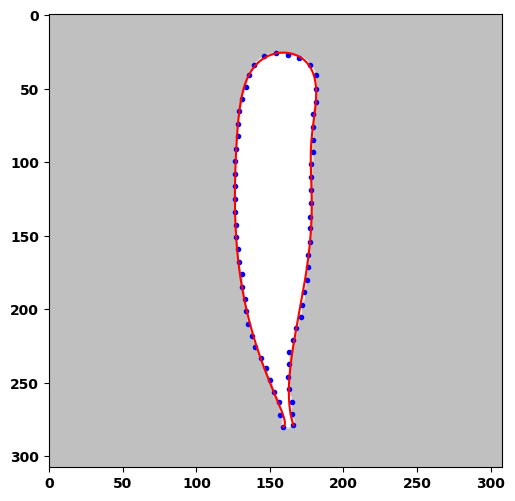

In [20]:
#### rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 30000 
Ims =[8]
Ns =[9]
erth = [0.5,0.5,0.5,0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode0',mode=0,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=3000,pat=2000,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

2022-02-16 15:58:14.092839


loss,▂▁▁▁▁▁▁▁▂▃▁▁▁▁▁▁▃█▁▁▁▁▁▁▁▁▁▁▆▂▂▂▂▃▂▂▂▂▂▂
loss,2.3964


^^^^^^^.^.^......
CP 5.0, steps:16, etime: 2.61283 err: 3.7219364813
^.....^.
CP 2.0, steps:24, etime: 3.62359 err: 1.8911410691
.^.......................................
CP 1.0, steps:65, etime: 8.81144 err: 0.9936015959
..................................
..............................................................^^^^^^^^^^^^^^^^^..^..................
.......................^^^^^^^^^^^^^^^^^^.^..^..........^.....^..........................^^^^^^^^^^^
^^^^^^^^^^^...^................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..^...^......
CP 0.65, steps:380, etime: 49.04560 err: 0.6495572931
...................
........^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.....
^^...^^^^^^^^^^^^^^^^^^.^......^.........^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^...^^^^.............................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^..^...

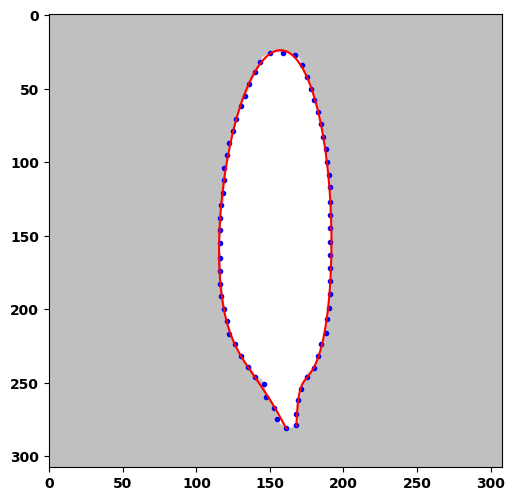

In [18]:
#### rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 30000 
Ims =[7]
Ns =[7]
erth = [0.5,0.5,0.5,0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode0',mode=0,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=3000,pat=2000,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

2022-02-16 15:27:11.072704


loss,█▃▂▂▂▂▂▂▂▂▂▂▁▁▁▂▂▃▁▁▁▁▂▂▃▂▁▁▁▅▁▁▁▄▁▁▂▁▂▁
loss,0.49293


^^^^^^^^^^^^.^.^^..^...^..............................................
CP 5.0, steps:69, etime: 17.08437 err: 4.9860196406
..............................
...................^^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.......^^^^^..................^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^..^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.........................................^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^........^^^^^.........^^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

loss,▃▂▂▂▃▂▂▂▂▂█▂▂▂▂▃▂▃▂▃▂▂▂▆▂▂▂▁▁▁▂▁▁▁▁▁▁▂▁▁
loss,1.05634


^^^^^^^.^^^^.^.
CP 5.0, steps:14, etime: 3.42302 err: 3.5297732529
^^^^.^^.^^.^^.^......................^^^^^^^^^^^^^^^^^^^^...^.....................^^^
^^^^^^^.^^.^..............................^^^^^^^^^^^.^^.^....................................^^^^^^
^^^^^^^^^^.........
CP 2.0, steps:218, etime: 40.43716 err: 1.9989312865
................................^^^^^^^^^^^^^.^...^..............................
...........^^^^^^^^^^^^^^^.^.^.^.^...^.........................................^^^^^^^^^^^^^^^^^^^..
.^.^.....................................^^^^^^^^^^^^^^^^^^^^.^....^.^..^.^.........................
......^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^.^.^.^.^.^.^.^.^.^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^.^^^^
^^^^^^.^.^.^.^.^.^.^.^.^.^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^.....^..^...^..^^..^..............^^..
^..^^..^...^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

loss,▃▂▂█▂▄▂▂▃▂▂▂▂▁▂▂▃▂▁▁▁▁▂▂▁▁▁▁▃▁▁▁▁▁▁▁▃▁▁▁
loss,1.51432


^^^^^^^.^.^......
CP 5.0, steps:16, etime: 3.06002 err: 3.7219364813
^.....^.
CP 2.0, steps:24, etime: 4.10662 err: 1.8911410691
.^.......................................
CP 1.0, steps:65, etime: 9.39636 err: 0.9936015959
..................................
..............................................................^^^^^^^^^^^^^^^^^..^..................
.......................^^^^^^^^^^^^^^^^^^.^..^..........^.....^..........................^^^^^^^^^^^
^^^^^^^^^^^...^................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..^...^......
CP 0.65, steps:380, etime: 51.17036 err: 0.6495572931
...................
........^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.....
^^...^^^^^^^^^^^^^^^^^^.^......^.........^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^...^^^^.............................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^..^...

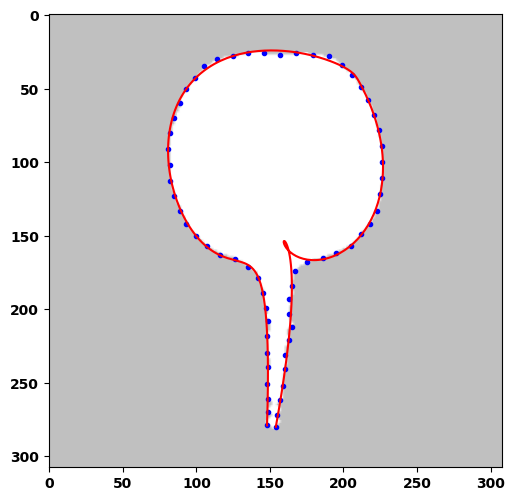

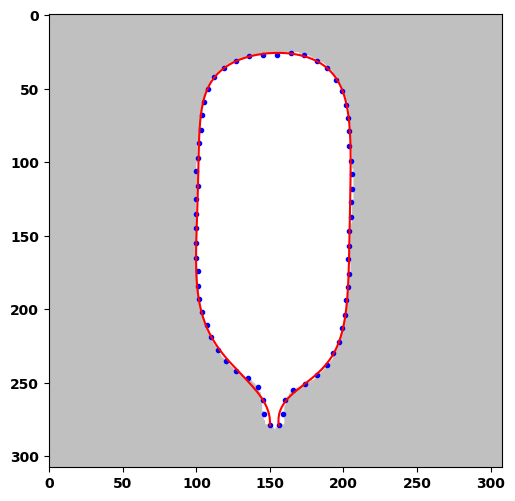

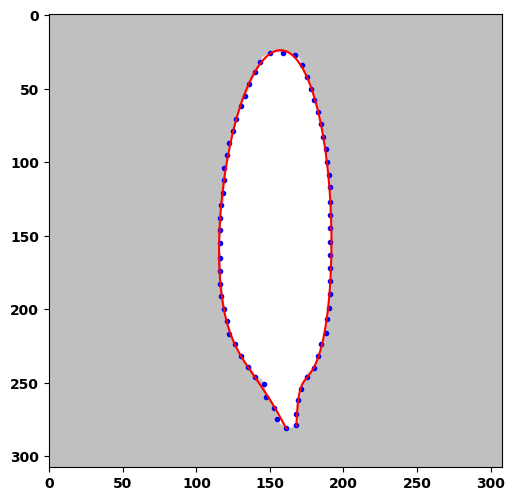

In [17]:
#### rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 30000 
Ims =[4,5,7]
Ns =[11,9,7]
erth = [0.5,0.5,0.5,0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode0',mode=0,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=3000,pat=1000,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

# rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 30000 
Ims =[0]
Ns =[12]
erth = [0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode0',mode=0,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=3000,pat=1000,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

2022-02-16 14:26:14.959917


loss,▄▁▁▁▁▁▃▆▁▁▂▅▂▂▁▂▁▁▂▁▄▁▁▁▁▁▁▁█▃▃▂▂▁▂▃▂▂▂▂
loss,1.95044


^^^^^^^^^.^...^.^....^.^............................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^...^^^...^^^^^^^^^^^^^^^^^^^^^^^...
CP 5.0, steps:176, etime: 36.62687 err: 4.9033607467
..................^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.......................
.....^^^^^^^^^^......^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^................................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^....
..............................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.................................
....^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..............^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

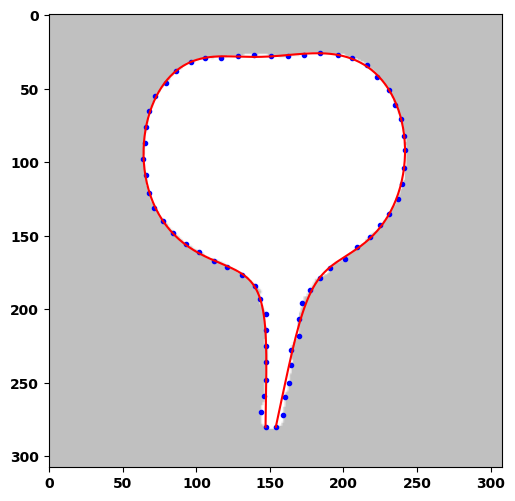

In [14]:
#### rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 30000 
Ims =[1]
Ns =[10]
erth = [0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode0',mode=0,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=3000,pat=1000,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

2022-02-16 13:55:29.747447


loss,▂▂▂▁▁▆▁▁▁▁▁▁▁▂▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▁▁▁
loss,1.91707


^^^^^^^^^^^^^^^^^
CP 5.0, steps:16, etime: 6.63237 err: 4.0432205147
^^.^..^.^^..^..^............................^^^^^^^^^^^^^^^^^....................^^
^^^^^^^^^^.^.^......................^^^^^^^^^^^^^.^.^............................^^^^^^^^^^^^^.^.^.^
....................................^^^^^^^^^^^^^^^^^^^^..............
CP 2.0, steps:269, etime: 78.48481 err: 1.9988831854
..............................
..^^^^^^^^^^^^^.^.^.^.^......................................^^^^^^^^^^^^^^^^^^.^.^..^..............
........................^^^^^^^^^^^^^^^^.^.^.^....^.^.^.^.............................^^^^^^^^^^^^^^
^^^^^^^.^..^.^..^^.^..^^^^^^^^^^^^^^^^^^^^^^^^^^^^...................
CP 1.0, steps:568, etime: 162.99073 err: 0.9971338648
............^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

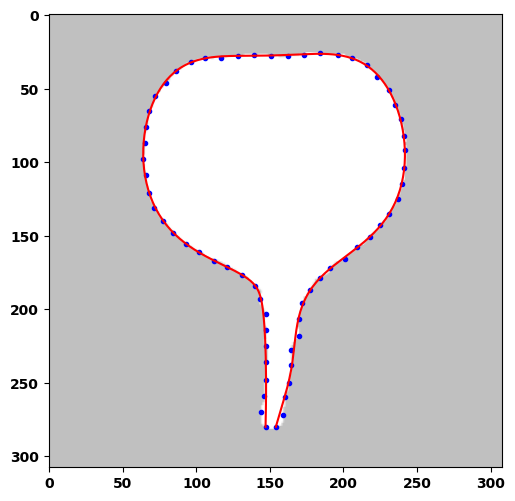

In [11]:
#### rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 50000 
Ims =[1]
Ns =[13]
erth = [0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode0',mode=0,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=3000,pat=1000,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

2022-02-16 13:34:26.677994


loss,▇▃▃▃▅▄▃▃▃▃▃▂▂█▂▂▂▄▂▂▂▂▂▂▂▂▂▂▂▂▁▅▂▁▁▁▁▁▄▁
loss,2.08097


^^^^^^^^^^^^^^^^^
CP 5.0, steps:16, etime: 5.60242 err: 4.6879622660
^^.^.^^.^^..^..^...................................................................
.^^^^^^^^^^^^^^^^^^......................................^^^^^^^^^^^^^^^..^^........................
................^^^^^^^^^^^^^^^^^^^^^...........................................^^^^^^^^^^^^^^^^^...
.............................................^^^^^^^^^^^^^^^^^^^^^^....^............................
.......
CP 2.0, steps:406, etime: 105.52013 err: 1.9996356700
.............^^^^^^^^^^^^^^^^^.^................................................^^^^^^^^^^^^^
^^^^^^^^^.^.^..^.^.^...............^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..............
CP 1.0, steps:596, etime: 153.79673 err: 0.9989635069
...
.............^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

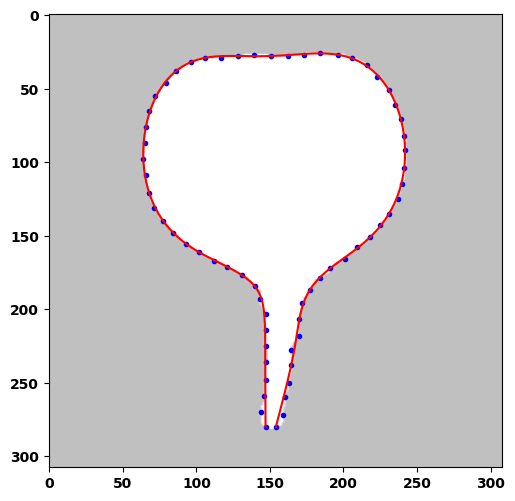

In [9]:
#### rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 50000 
Ims =[1]
Ns =[12]
erth = [0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode0',mode=0,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=3000,pat=1000,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

2022-02-16 12:54:05.098471


loss,▅▅▄▃▃▃▃▃▂▃▂▂▃▁▂▃▃▁▁▁▁▁▁▁█▂▂▂▃▃▃▃▃▃▃▄▄▃▃▃
loss,2.01322


^^^^.^..^.....^.....................................................................................
.........................................................................^^^^^.^^.^^................
..............................................................^^^^^^.^.
CP 5.0, steps:270, etime: 35.28751 err: 4.7320453408
^..^.........................
.......................................
CP 2.0, steps:338, etime: 44.04553 err: 1.9903493154
.....^^^^^^^^^^.^....^.......................................
...................^^^^^^^^^^^^^^^.^.....................
CP 1.0, steps:456, etime: 59.66157 err: 0.9898158410
......................................^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..
CP 0.65, steps:753, etime: 98.03382 err: 0.6214184314
.....^.^^^^^^^^^^^^^^^

loss,█▇▅▃▂▁▁▁▂▁▁▃▁▁▁▁▁▁▁▁▁▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,1.13412


^^^^^^^^^^....^.^....^..^..........................^^^^^^^^^^^^^^^^^^^................^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^......
CP 5.0, steps:148, etime: 35.28924 err: 4.9898207723
....................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
.............^^^^^^^^^^...^^^^^^^^^^^^^^^^^^^^^^^^...............................^^^^^^^^^^^^^^^^^^^
^^^^^^......^..........................^^^^^^^^^^^^^^.^^^^^^^^^^^^^^.^.^....^^^^^^^^^^^^....^^^^^^^^
^^^^^..^^^^^^^^^^^^^^.
CP 2.0, steps:421, etime: 98.34782 err: 1.9872829761
.........^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..^^^^......................^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..................................^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.....^.^^^^^^^^^^^^^^^^^^^
^^^^.........^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^...^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

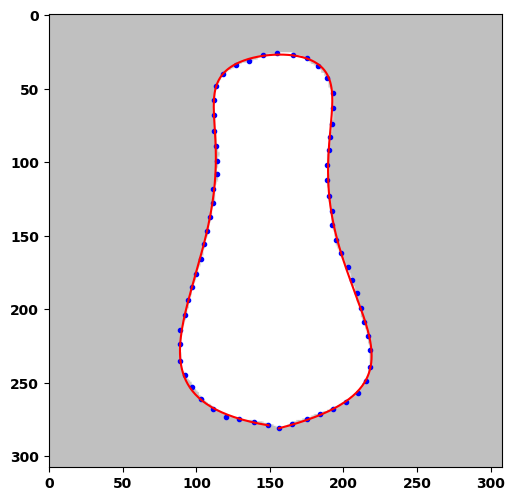

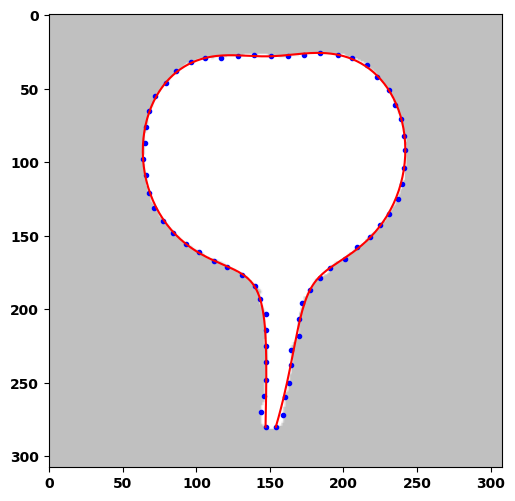

In [6]:
#### rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 30000 
Ims =[0,1]
Ns =[7,11]
erth = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode0',mode=0,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=3000,pat=1000,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

2022-02-16 11:21:32.739270


wandb: Currently logged in as: aquapathos (use `wandb login --relogin` to force relogin)


^^^^^^^^^.^...^.^....^.^............................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^...^^^...^^^^^^^^^^^^^^^^^^^^^^^...
CP 5.0, steps:176, etime: 36.29014 err: 4.9033607467
..................^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.......................
.....^^^^^^^^^^......^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^................................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^....
..............................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.................................
....^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..............^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

loss,▄▅▄▃▃█▄▂▇▂▂▂▂▂▂▃▂▁▂▂▁▁▁▁▁▂▁▁▁▁▃▁▁▁▁▁▁▁▁▁
loss,5.2642


^^^^^^^^^.^^^^.^.
CP 5.0, steps:16, etime: 4.89779 err: 4.4923878767
...^..^..
CP 2.0, steps:25, etime: 7.02322 err: 1.9507650802
^...............................................^^^^^^^^^^^.^^..^..^.^....
....................^^^^^^^^^^^^^.^^.^^.^^.^..................................^^^^^^^^^^.^^^^^.^.^^.
^.^...................................^^^^^^^^^^^^^^.^^^^.^.^.^.....................................
.^^^^^^^^^^^^^^^^^^^^.^.^.^.^.^...................................^^^^^^^^^^^^^^^^^^^^^^.^^.^^.^^^^^
^^.^^.^^.^^.^^.^^.^^..^^.^^.^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^.^.^.^^^^^^.^.^^^^^^.^.^^^^^^.^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^.^^^.
^.^.^.^.^.^.^.^.^.^.^.^.^^.^.^.^.^.^^^^^^^^^^^^^^^^^^^^^^^^^.^^^.^^^^^^.^.^.^.^^^^^^^^^^^^.^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^.^.^.^.^.^.^.^^^^^^^^^^^^.^.^.^^^^^^^^^^^^^^^^^^^^^^^^^.

loss,▃▃▃▃▃▂▂▂▃▂▂▃▂▂▂▃▄▂▂▂▂▂▃█▂▁▃▆▃▁▂▂▂▁▁▁▁▁▂▁
loss,0.49782


^^^.^.^.^.^.^..^.^..^....................................................................^^^^^^.^^^.
CP 5.0, steps:99, etime: 13.24342 err: 4.9332462166

^.............................................^^^^.^^^^^.^....^.....................................
............^^^^^^.^^.^..^.^...........................................................^^^^^^^.^.^^^
^........................................................^^^^^^^^^^^.^.^.^.......^.^......^.........
....^............................^^^^^^^^^^^^^.^.^^.^^.^.^^.^^.^..^.................................
..............^^^^^^^^^^^^^.^..^.^........
CP 2.0, steps:541, etime: 69.92075 err: 1.9968711989
..........................................................
..................^^^^^^^^^^^^^^^^.^.^.^............................................................
..............^^^^^^^^^^^^^^^^.^.^.^................................................................
............^^^^^^^^^^^^^^^^^^.^.^.
CP 1.0, steps:834, etime: 107.32834 err: 0.999828

loss,█▄▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁
loss,0.49889


^^^^^^^^^^^^^..^.
CP 5.0, steps:16, etime: 5.55546 err: 4.2261964533
^..^.^^.^..^.......................................................................
..........................................^^^..^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^.
.^^.....................................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^........^^^^^^^^..^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^....
CP 2.0, steps:488, etime: 124.19245 err: 1.9968413353
...........
.................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.............................^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^...............................................^^^^^^^^^^^^^^^^^^^^^^^.........
CP 1.0, steps:697, etime: 177.06289 err: 0.9934380444
..
...........................^^.^^^^^^^^^^^^^^^^^^^^^^^^................................^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

loss,▆▄▃▃▃▃▃▃▃▃▃▃█▆▃▂▂▃▂▃▂▂▂▁▁▁▂▂▁▁▂▁▇▁▃▁▂▁▁▁
loss,0.49848


^^^^^^^^
CP 5.0, steps:7, etime: 3.12278 err: 3.8180572776
^^^^^^^^.^^.^.
CP 2.0, steps:21, etime: 6.23697 err: 1.8975844321
^^.^^.........................................................................
................................................................^^^^^^^^^^^^........................
................^^^^^^^^^^^^^^.............................................^^^^^^^^^^.^.^.^.........
................
CP 1.0, steps:315, etime: 72.54630 err: 0.9988669577
...........^^^^^^^^^^^^^.^.^....................................^^^^^^^^^^^^^^^.^..^
.^^...^.................................^^^^^^^^^^^^^^^^^^.^^^.^^^^^^^^^.^.^.^^^.^^^.^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^.^^^^^^^^^^^^^^^^.^.^.
CP 0.65, steps:540, etime: 123.23016 err: 0.6250286595
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^.^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^.^.^.^.^.^^^^^^^^^^^^^^^^.E

Matrix([[156.0*t**11 + 182.339*t**10*(11 - 11*t) + 4544.0*t**9*(1 - t)**2 + 162961.0*t**8*(1 - t)**3 -

loss,▆▃▃▃▃▂▂▂▂▂▂▂▂▃▂▂█▂▂▂▂▂▂▂▁▁▂▂▂▁▁▁▃▃▂█▁▂▁▁
loss,0.49944


^^^^^^^^^^^^^^^^.
CP 5.0, steps:16, etime: 5.58366 err: 4.4679745989
^....^.............................................................................
..................
CP 2.0, steps:117, etime: 31.09507 err: 1.9933972643
..............................................................................^^^^
^^^^^^.^.......^^^^...^^^.........................^^^^^^.^^^^^^^.^^..
CP 1.0, steps:268, etime: 69.09297 err: 0.9891698880
...............^^^^^^^^^^^^^^^^
^^....^......^^^^^^^^^^^^^^^^^^^^^^^^..........
CP 0.65, steps:346, etime: 88.81895 err: 0.6469183226
......^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^.^.^^^.^^^^^.^^^^^.^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

loss,▄▃▂▂▂▁▁▂█▁▁▁▂▂▁▂▁▂▄▃▂▁▁▆▂▁▁▂▃▁▁▄▁▂▁▂▂▁▁▄
loss,1.35332


^^^^^^^^^..^..^.
CP 5.0, steps:15, etime: 2.94983 err: 4.6002333819
^....^................
CP 2.0, steps:37, etime: 6.15923 err: 1.9956066009
..............................................................
.................................................................^^^^^^^^^^^^^^^^^..^..^......^.....
.............................^^^^^^^^^^^^^^^^^^^...............
CP 1.0, steps:262, etime: 39.52840 err: 0.9981190059
................^^^^^^^^^^^^^^^^^^^..
...................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..............
CP 0.65, steps:369, etime: 55.33511 err: 0.6485982072
...............^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^...........................^^^^^^^^^^^^^^^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..E

Matrix([[161.0*t**8 + 123.504*t**7*(8 - 8*t) + 4734.1*t**6*(1 - t)**2 - 3321.98*t**5*(1 - t)**3 + 17722.8*t**4*(1 - t)**4 + 11912.0*t**3*(1 - t)**5 + 5851.72*t**2*(1 - t)**6 + 1311.53*t*(1 - t)**7 + 168.0*(1 - t)**8], [281.0*

loss,▇▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁█▁
loss,0.49693


^^^^^^^^^.^.^..^.
CP 5.0, steps:16, etime: 3.74403 err: 4.8899487018
^.^..^^.^..^.......................................................................
.............................^^^^^^^^.^^.^.................................................^^^^.^^.^
^.^^.^^.......
CP 2.0, steps:213, etime: 38.64851 err: 1.9992827250
................................................^^^^^^^^^^^^^.^^^....^................
...........................^^^^^^^^^^^^.^^^^...^.^...............................................^^^
^^^^^^^^^^^^^.^.^^^^^^^^^^^^^.....^^^^^....................^^^^^^^^^^^^^^......^^^..................
..^^^^^^^^^^^^^^.^^^^^^^.^^.^^.............^^^^^^^^^...................^^^^^^^^^^^^^^^^^^^...^.^.^.^
..............^...^................................................^^^^^^^^^^^^^^^.
CP 1.0, steps:682, etime: 121.44479 err: 0.9994837529
^^.^^.^.^^^.^.^.^
.^.^.^.^.^.^.^.^.^.^.^.^.^.^.^.^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

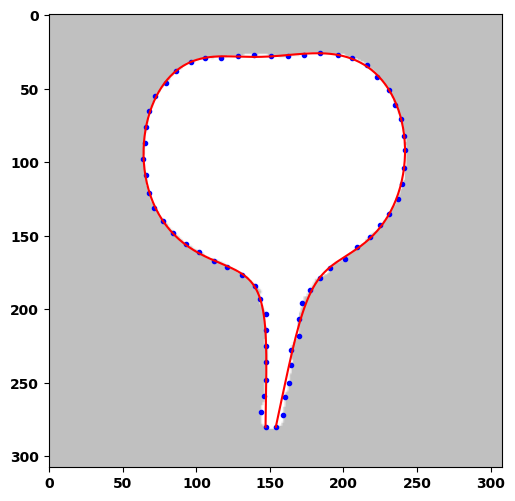

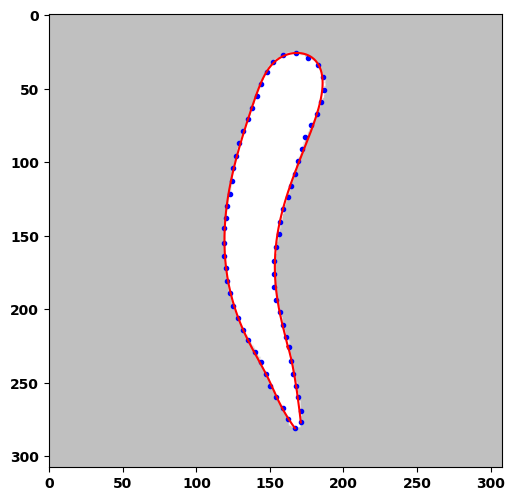

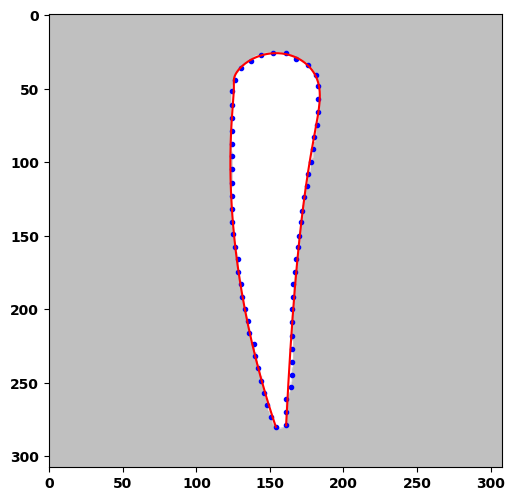

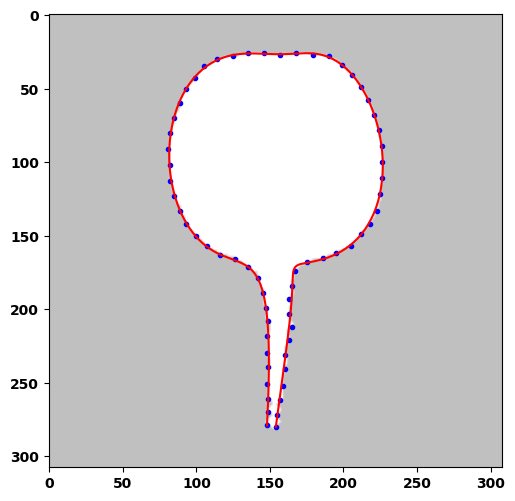

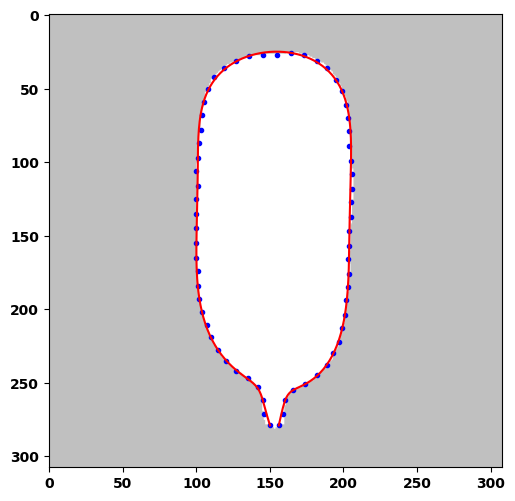

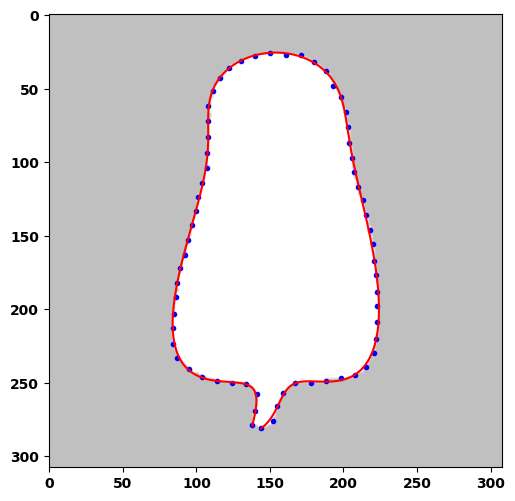

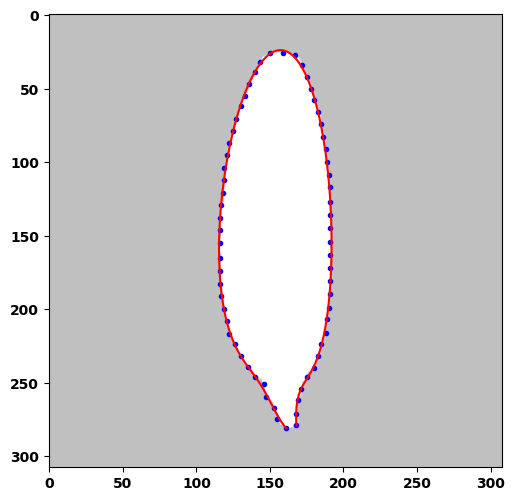

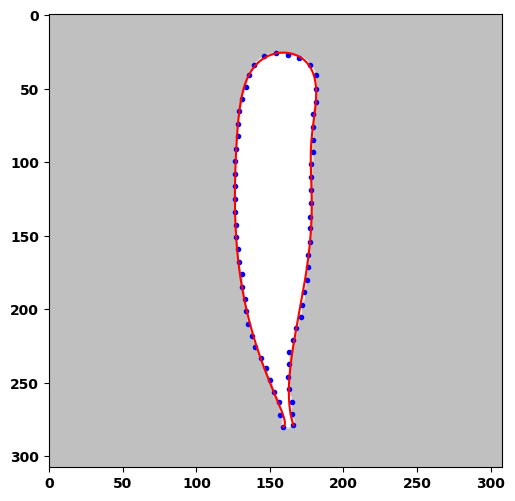

In [5]:
#### rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 30000 
Ims =[1,2,3,4,5,6,7,8]
Ns =[10,11,7,12,11,12,8,9] # 1 は１２のまちがい
erth = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode0',mode=0,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=3000,pat=1000,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

2022-02-16 02:49:35.087478


loss,█▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,6.36296


^^^^.^..^.....^.....................................................................................
.........................................................................^^^^^.^^.^^................
..............................................................^^^^^^.^.E

Matrix([[156.0*t**7 + 469.029*t**6*(7 - 7*t) - 9852.98*t**5*(1 - t)**2 + 43476.2*t**4*(1 - t)**3 - 31124.4*t**3*(1 - t)**4 + 14854.3*t**2*(1 - t)**5 - 981.35*t*(1 - t)**6 + 149.0*(1 - t)**7], [281.0*t**7 + 191.242*t**6*(7 - 7*t) + 2237.29*t**5*(1 - t)**2 - 2089.13*t**4*(1 - t)**3 - 2547.07*t**3*(1 - t)**4 + 2037.97*t**2*(1 - t)**5 + 1452.37*t*(1 - t)**6 + 279.0*(1 - t)**7]])
img 0: err_th: 5.000000, steps:270, minerror: 4.7320453408, etime: 44.06447
2022-02-16 02:50:19.167573


loss,█▄▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,4.73205


^^^^^^^^^^^^^^.E

Matrix([[154.0*t**12 + 194.881*t**11*(12 - 12*t) + 8360.12*t**10*(1 - t)**2 + 9375.32*t**9*(1 - t)**3 + 401772.0*t**8*(1 - t)**4 - 26057.5*t**7*(1 - t)**5 + 40523.4*t**6*(1 - t)**6 + 350557.0*t**5*(1 - t)**7 - 240804.0*t**4*(1 - t)**8 + 41811.0*t**3*(1 - t)**9 + 15972.2*t**2*(1 - t)**10 + 1382.46*t*(1 - t)**11 + 147.0*(1 - t)**12], [280.0*t**12 + 203.102*t**11*(12 - 12*t) + 31360.6*t**10*(1 - t)**2 - 316692.0*t**9*(1 - t)**3 + 2.26067e+6*t**8*(1 - t)**4 - 6.28521e+6*t**7*(1 - t)**5 + 8.74249e+6*t**6*(1 - t)**6 - 6.38442e+6*t**5*(1 - t)**7 + 2.33409e+6*t**4*(1 - t)**8 - 321777.0*t**3*(1 - t)**9 + 29917.9*t**2*(1 - t)**10 + 2406.46*t*(1 - t)**11 + 280.0*(1 - t)**12]])
img 1: err_th: 5.000000, steps:14, minerror: 4.0522854004, etime: 13.39020
2022-02-16 02:50:32.557769


loss,█▅▇▂▄▁▃▁▂▁▁▁▁▁▁
loss,4.05229


^^^^^^^^^.^^^^.^.E

Matrix([[167.0*t**11 + 100.961*t**10*(11 - 11*t) + 21956.7*t**9*(1 - t)**2 - 155047.0*t**8*(1 - t)**3 + 803858.0*t**7*(1 - t)**4 - 1.55048e+6*t**6*(1 - t)**5 + 1.65478e+6*t**5*(1 - t)**6 - 570803.0*t**4*(1 - t)**7 + 130050.0*t**3*(1 - t)**8 + 18.2855*t**2*(1 - t)**9 + 2054.92*t*(1 - t)**10 + 171.0*(1 - t)**11], [281.0*t**11 + 215.935*t**10*(11 - 11*t) + 15771.2*t**9*(1 - t)**2 - 8057.93*t**8*(1 - t)**3 + 77344.3*t**7*(1 - t)**4 + 271344.0*t**6*(1 - t)**5 - 748568.0*t**5*(1 - t)**6 + 533741.0*t**4*(1 - t)**7 - 111934.0*t**3*(1 - t)**8 + 24338.4*t**2*(1 - t)**9 + 2104.26*t*(1 - t)**10 + 277.0*(1 - t)**11]])
img 2: err_th: 5.000000, steps:16, minerror: 4.4923878767, etime: 13.87058
2022-02-16 02:50:46.428353


loss,█▅▇▃▄▂▃▁▂▁▂▁▁▁▁▁▁
loss,4.49239


^^^.^.^.^.^.^..^.^..^....................................................................^^^^^^.^^^.E

Matrix([[154.0*t**7 + 93.6545*t**6*(7 - 7*t) + 6511.11*t**5*(1 - t)**2 - 12151.5*t**4*(1 - t)**3 + 23802.7*t**3*(1 - t)**4 - 874.087*t**2*(1 - t)**5 + 1446.77*t*(1 - t)**6 + 161.0*(1 - t)**7], [280.0*t**7 + 182.078*t**6*(7 - 7*t) + 6472.21*t**5*(1 - t)**2 - 6550.45*t**4*(1 - t)**3 - 5744.96*t**3*(1 - t)**4 + 5632.21*t**2*(1 - t)**5 + 1080.52*t*(1 - t)**6 + 279.0*(1 - t)**7]])
img 3: err_th: 5.000000, steps:99, minerror: 4.9332462166, etime: 21.66310
2022-02-16 02:51:08.094462


loss,▇█▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,4.93325


^^^^^^^^^^^^^..^.E

Matrix([[154.0*t**12 + 143.692*t**11*(12 - 12*t) + 23945.8*t**10*(1 - t)**2 - 135497.0*t**9*(1 - t)**3 + 862658.0*t**8*(1 - t)**4 - 849322.0*t**7*(1 - t)**5 + 780930.0*t**6*(1 - t)**6 + 115822.0*t**5*(1 - t)**7 - 262564.0*t**4*(1 - t)**8 + 92803.5*t**3*(1 - t)**9 + 7023.85*t**2*(1 - t)**10 + 1803.24*t*(1 - t)**11 + 148.0*(1 - t)**12], [280.0*t**12 + 197.515*t**11*(12 - 12*t) + 29557.2*t**10*(1 - t)**2 - 287249.0*t**9*(1 - t)**3 + 1.92592e+6*t**8*(1 - t)**4 - 4.68788e+6*t**7*(1 - t)**5 + 6.04825e+6*t**6*(1 - t)**6 - 4.47803e+6*t**5*(1 - t)**7 + 1.74286e+6*t**4*(1 - t)**8 - 239624.0*t**3*(1 - t)**9 + 24735.4*t**2*(1 - t)**10 + 2491.57*t*(1 - t)**11 + 279.0*(1 - t)**12]])
img 4: err_th: 5.000000, steps:16, minerror: 4.2261964533, etime: 15.04341
2022-02-16 02:51:23.142866


loss,▇▆█▃▄▂▃▁▂▁▂▁▁▁▁▁▁
loss,4.2262


^^^^^^^^E

Matrix([[156.0*t**11 + 167.331247649544*t**10*(11 - 11*t) + 9752.14538842926*t**9*(1 - t)**2 + 138231.457679504*t**8*(1 - t)**3 - 622949.209175557*t**7*(1 - t)**4 + 1836567.48789725*t**6*(1 - t)**5 - 1737576.37966984*t**5*(1 - t)**6 + 795444.143073781*t**4*(1 - t)**7 - 118257.595434137*t**3*(1 - t)**8 + 10930.9425217944*t**2*(1 - t)**9 + 1448.51939772261*t*(1 - t)**10 + 150.0*(1 - t)**11], [279.0*t**11 + 202.768545462779*t**10*(11 - 11*t) + 21800.0073468774*t**9*(1 - t)**2 - 64286.9605152772*t**8*(1 - t)**3 + 306624.164635817*t**7*(1 - t)**4 - 344787.312332756*t**6*(1 - t)**5 + 5534.70078779839*t**5*(1 - t)**6 + 124252.211786395*t**4*(1 - t)**7 - 19598.1988782228*t**3*(1 - t)**8 + 17242.1172807058*t**2*(1 - t)**9 + 2298.68441794816*t*(1 - t)**10 + 279.0*(1 - t)**11]])
img 5: err_th: 5.000000, steps:7, minerror: 2.2967914973, etime: 11.98417
2022-02-16 02:51:35.128171


loss,▇▅█▁▅▁▃▁
loss,3.81806


^^^^^^^^^^^^^^^^.E

Matrix([[144.0*t**12 + 211.0*t**11*(12 - 12*t) - 3237.78*t**10*(1 - t)**2 + 296039.0*t**9*(1 - t)**3 - 814546.0*t**8*(1 - t)**4 + 1.11091e+6*t**7*(1 - t)**5 + 1.19698e+6*t**6*(1 - t)**6 - 2.19931e+6*t**5*(1 - t)**7 + 1.24873e+6*t**4*(1 - t)**8 - 194469.0*t**3*(1 - t)**9 + 9925.45*t**2*(1 - t)**10 + 1801.5*t*(1 - t)**11 + 138.0*(1 - t)**12], [281.0*t**12 + 255.577*t**11*(12 - 12*t) - 9646.65*t**10*(1 - t)**2 + 475746.0*t**9*(1 - t)**3 - 2.45498e+6*t**8*(1 - t)**4 + 6.69035e+6*t**7*(1 - t)**5 - 8.69569e+6*t**6*(1 - t)**6 + 5.35884e+6*t**5*(1 - t)**7 - 1.49815e+6*t**4*(1 - t)**8 + 210180.0*t**3*(1 - t)**9 + 15419.3*t**2*(1 - t)**10 + 2319.23*t*(1 - t)**11 + 279.0*(1 - t)**12]])
img 6: err_th: 5.000000, steps:16, minerror: 4.4679745989, etime: 13.79875
2022-02-16 02:51:48.926924


loss,█▅▆▂▄▂▂▁▂▁▁▁▁▁▁▁▁
loss,4.46797


^^^^^^^^^..^..^.E

Matrix([[161.0*t**8 + 113.083*t**7*(8 - 8*t) + 3212.88*t**6*(1 - t)**2 + 3138.06*t**5*(1 - t)**3 + 10888.3*t**4*(1 - t)**4 + 14614.0*t**3*(1 - t)**5 + 4925.48*t**2*(1 - t)**6 + 1549.86*t*(1 - t)**7 + 168.0*(1 - t)**8], [281.0*t**8 + 253.981*t**7*(8 - 8*t) - 196.669*t**6*(1 - t)**2 + 36279.0*t**5*(1 - t)**3 - 64320.5*t**4*(1 - t)**4 + 29402.0*t**3*(1 - t)**5 + 1281.79*t**2*(1 - t)**6 + 1842.25*t*(1 - t)**7 + 279.0*(1 - t)**8]])
img 7: err_th: 5.000000, steps:15, minerror: 4.6002333819, etime: 11.67360
2022-02-16 02:52:00.616155


loss,█▅▃▂▃▂▁▂▁▁▁▁▁▁▁▁
loss,4.60023


^^^^^^^^^.^.^..^.E

Matrix([[159.0*t**9 + 172.986*t**8*(9 - 9*t) - 3020.16*t**7*(1 - t)**2 + 60493.5*t**6*(1 - t)**3 - 122234.0*t**5*(1 - t)**4 + 164774.0*t**4*(1 - t)**5 - 38211.1*t**3*(1 - t)**6 + 14678.1*t**2*(1 - t)**7 + 1037.28*t*(1 - t)**8 + 166.0*(1 - t)**9], [280.0*t**9 + 234.624*t**8*(9 - 9*t) + 3054.5*t**7*(1 - t)**2 + 27325.0*t**6*(1 - t)**3 - 2576.54*t**5*(1 - t)**4 - 68270.5*t**4*(1 - t)**5 + 49664.2*t**3*(1 - t)**6 - 401.362*t**2*(1 - t)**7 + 2290.21*t*(1 - t)**8 + 279.0*(1 - t)**9]])
img 8: err_th: 5.000000, steps:16, minerror: 4.8899487018, etime: 13.26589


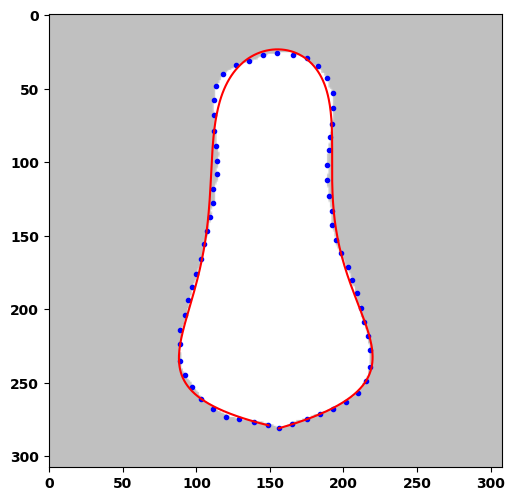

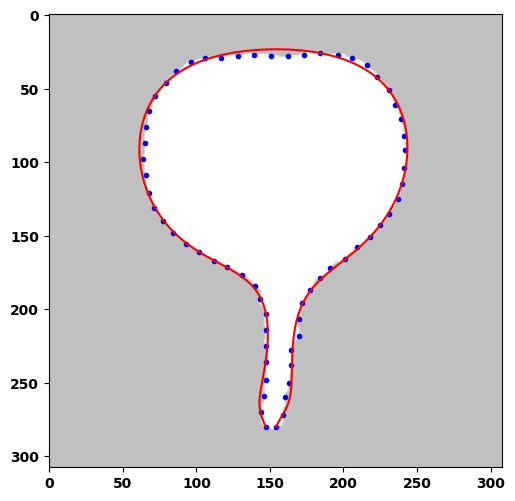

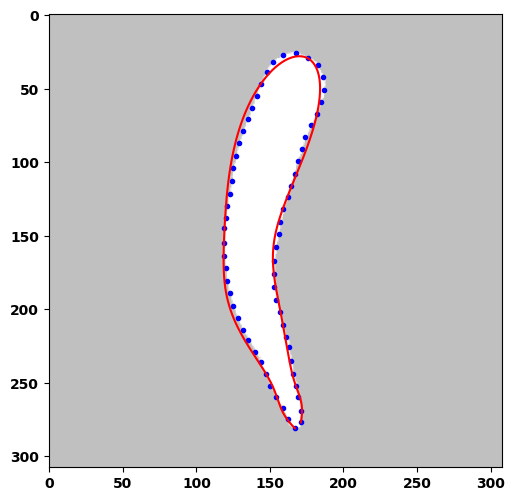

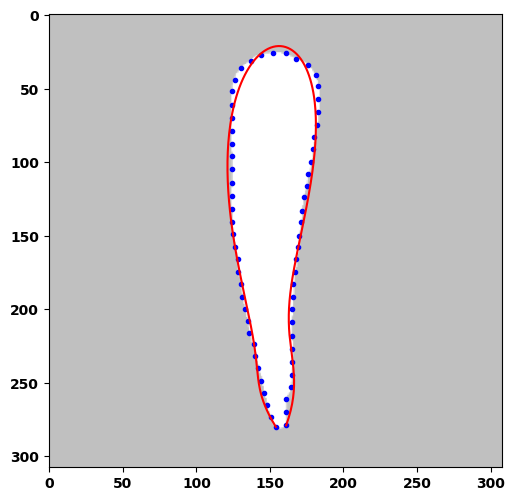

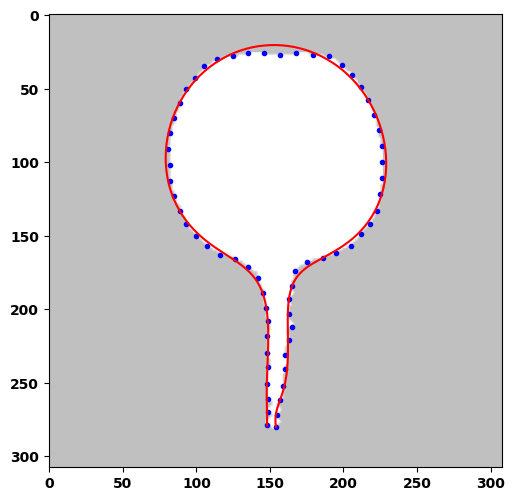

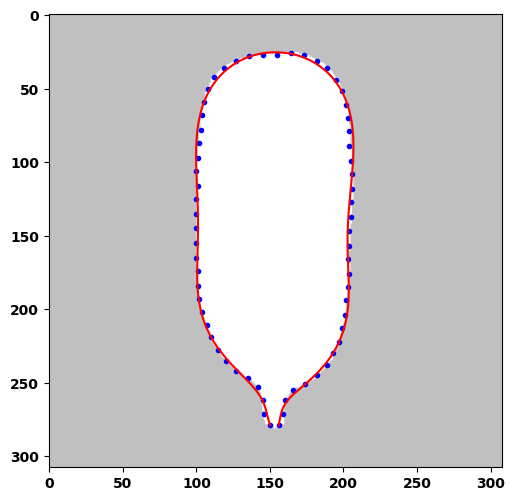

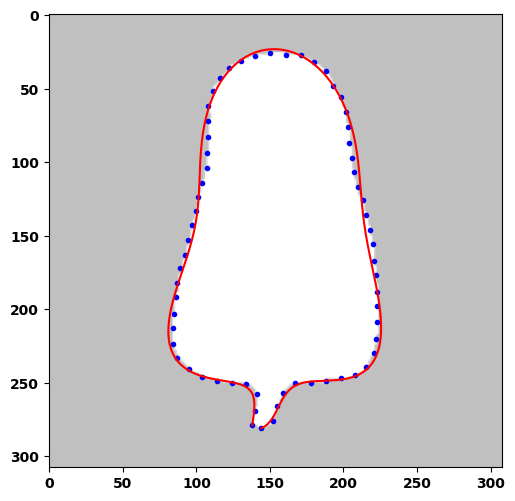

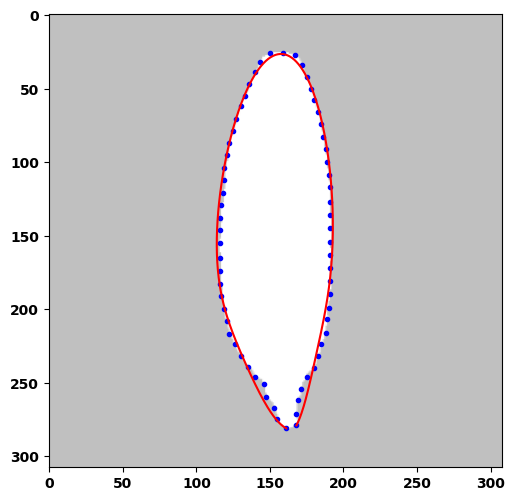

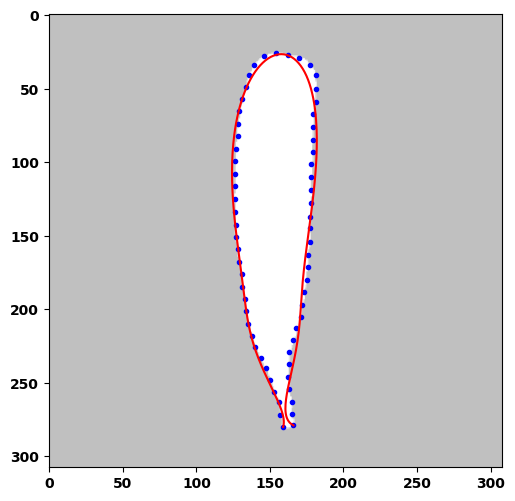

In [24]:
rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 30000
Ims =[0,1,2,3,4,5,6,7,8]
Ns =[7,12,11,7,12,11,12,8,9]
erth = [5,5,5,5,5,5,5,5,5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode1',mode=0,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=1000,pat=200,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

In [ ]:
rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 30000
Ims =[0,1,2,3,4,5,6,7,8]
Ns =[7,10,11,10,11,9,12,7,9]
erth = [5,5,5,5,5,5,5,5,5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode1',mode=0,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=1000,pat=200,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

2022-02-16 01:27:55.202864


loss,█▅▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,1.2231


....................................................................................................
.......E

Matrix([[156.0*t**7 + 479.939817200477*t**6*(7 - 7*t) - 10741.3581933341*t**5*(1 - t)**2 + 46172.3142728576*t**4*(1 - t)**3 - 33839.1021650804*t**3*(1 - t)**4 + 15726.7023582617*t**2*(1 - t)**5 - 1068.98823470187*t*(1 - t)**6 + 149.0*(1 - t)**7], [281.0*t**7 + 186.76610523502*t**6*(7 - 7*t) + 2509.95079759862*t**5*(1 - t)**2 - 1800.27309202201*t**4*(1 - t)**3 - 3681.35172377348*t**3*(1 - t)**4 + 2759.22764718398*t**2*(1 - t)**5 + 1393.87862118749*t*(1 - t)**6 + 279.0*(1 - t)**7]])
img 0: err_th: 5.000000, steps:106, minerror: 4.8738651640, etime: 62.09911
2022-02-16 01:28:57.317635


loss,█▆▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
loss,4.87387


....E

Matrix([[154.0*t**10 + 193.108909544102*t**9*(10 - 10*t) + 3526.34997982892*t**8*(1 - t)**2 + 37007.374455444*t**7*(1 - t)**3 + 138073.194551864*t**6*(1 - t)**4 - 61426.8087192961*t**5*(1 - t)**5 + 63893.4877487346*t**4*(1 - t)**6 - 47895.0660023835*t**3*(1 - t)**7 + 17320.4860886562*t**2*(1 - t)**8 + 1073.04130574208*t*(1 - t)**9 + 147.0*(1 - t)**10], [280.0*t**10 + 298.670506798387*t**9*(10 - 10*t) - 17944.9890138161*t**8*(1 - t)**2 + 200084.618974573*t**7*(1 - t)**3 - 551517.648512351*t**6*(1 - t)**4 + 767291.320079443*t**5*(1 - t)**5 - 580136.444553373*t**4*(1 - t)**6 + 221897.300843754*t**3*(1 - t)**7 - 21564.2612863706*t**2*(1 - t)**8 + 3036.08609749048*t*(1 - t)**9 + 280.0*(1 - t)**10]])
img 1: err_th: 5.000000, steps:3, minerror: 4.9092641836, etime: 14.25357
2022-02-16 01:29:11.571206


loss,█▄▂▁
loss,4.90926


..E

Matrix([[167.0*t**11 + 98.8987656422429*t**10*(11 - 11*t) + 24066.4295737689*t**9*(1 - t)**2 - 172767.504957932*t**8*(1 - t)**3 + 862468.614649038*t**7*(1 - t)**4 - 1627893.75550415*t**6*(1 - t)**5 + 1700494.84398371*t**5*(1 - t)**6 - 585808.046589928*t**4*(1 - t)**7 + 132748.233762354*t**3*(1 - t)**8 - 130.326567553801*t**2*(1 - t)**9 + 2044.08070873243*t*(1 - t)**10 + 171.0*(1 - t)**11], [281.0*t**11 + 214.421619567276*t**10*(11 - 11*t) + 20198.0232420899*t**9*(1 - t)**2 - 56098.1880553681*t**8*(1 - t)**3 + 223032.018368888*t**7*(1 - t)**4 + 106381.123846693*t**6*(1 - t)**5 - 706506.265338724*t**5*(1 - t)**6 + 574557.357123334*t**4*(1 - t)**7 - 131228.375344224*t**3*(1 - t)**8 + 25767.9804000766*t**2*(1 - t)**9 + 2047.94698749045*t*(1 - t)**10 + 277.0*(1 - t)**11]])
img 2: err_th: 5.000000, steps:1, minerror: 4.4339514985, etime: 12.10658
2022-02-16 01:29:23.677782


loss,█▁
loss,4.43395


.....E

Matrix([[154.0*t**10 + 154.763133866897*t**9*(10 - 10*t) + 1439.27399552378*t**8*(1 - t)**2 + 38255.4274587777*t**7*(1 - t)**3 + 2125.96246286496*t**6*(1 - t)**4 - 75900.267017929*t**5*(1 - t)**5 + 223485.699996367*t**4*(1 - t)**6 - 52362.1433497134*t**3*(1 - t)**7 + 16994.7636049356*t**2*(1 - t)**8 + 1324.35503004557*t*(1 - t)**9 + 161.0*(1 - t)**10], [280.0*t**10 + 238.165685380383*t**9*(10 - 10*t) + 10193.9028098481*t**8*(1 - t)**2 - 37221.5458001367*t**7*(1 - t)**3 + 294220.93450592*t**6*(1 - t)**4 - 526442.165097017*t**5*(1 - t)**5 + 323561.120800734*t**4*(1 - t)**6 - 59475.7211219207*t**3*(1 - t)**7 + 13826.7144448854*t**2*(1 - t)**8 + 2114.50550735194*t*(1 - t)**9 + 279.0*(1 - t)**10]])
img 3: err_th: 5.000000, steps:4, minerror: 4.6209584635, etime: 14.60210
2022-02-16 01:29:38.279883


loss,█▅▃▂▁
loss,4.62096


.......E

Matrix([[154.0*t**11 + 132.827594255653*t**10*(11 - 11*t) + 23848.7719582978*t**9*(1 - t)**2 - 154426.836983306*t**8*(1 - t)**3 + 898617.133705734*t**7*(1 - t)**4 - 1305454.58579689*t**6*(1 - t)**5 + 1383728.52457865*t**5*(1 - t)**6 - 683538.577439248*t**4*(1 - t)**7 + 153753.884770444*t**3*(1 - t)**8 - 74.6033665453421*t**2*(1 - t)**9 + 1801.74440499649*t*(1 - t)**10 + 148.0*(1 - t)**11], [280.0*t**11 + 283.409985018391*t**10*(11 - 11*t) - 3834.6538717851*t**9*(1 - t)**2 + 35238.8851050838*t**8*(1 - t)**3 + 315400.625335855*t**7*(1 - t)**4 - 860503.477876288*t**6*(1 - t)**5 + 905946.947958031*t**5*(1 - t)**6 - 559683.293591614*t**4*(1 - t)**7 + 223897.244515601*t**3*(1 - t)**8 - 19193.3328333592*t**2*(1 - t)**9 + 3374.33484703017*t*(1 - t)**10 + 279.0*(1 - t)**11]])
img 4: err_th: 5.000000, steps:6, minerror: 4.7827586127, etime: 18.10358
2022-02-16 01:29:56.383465


loss,█▇▆▄▃▂▁
loss,4.78276


.E

Matrix([[156.0*t**9 + 116.027563931654*t**8*(9 - 9*t) + 24495.8292912463*t**7*(1 - t)**2 - 87889.9672153121*t**6*(1 - t)**3 + 294968.628922772*t**5*(1 - t)**4 - 254038.178321075*t**4*(1 - t)**5 + 112203.012493388*t**3*(1 - t)**6 - 13757.4456450563*t**2*(1 - t)**7 + 1783.73950403556*t*(1 - t)**8 + 150.0*(1 - t)**9], [279.0*t**9 + 234.066860298807*t**8*(9 - 9*t) + 4957.83706638617*t**7*(1 - t)**2 + 19968.6664429692*t**6*(1 - t)**3 - 16322.6803124598*t**5*(1 - t)**4 - 28968.1124307195*t**4*(1 - t)**5 + 24316.7746755362*t**3*(1 - t)**6 + 4438.07606599601*t**2*(1 - t)**7 + 2065.53898816238*t*(1 - t)**8 + 279.0*(1 - t)**9]])
img 5: err_th: 5.000000, steps:0, minerror: 4.4371143350, etime: 10.35252
2022-02-16 01:30:06.738982


loss,▁
loss,4.43711


.E

Matrix([[144.0*t**12 + 203.49764357492*t**11*(12 - 12*t) - 4569.90330190522*t**10*(1 - t)**2 + 314020.694983865*t**9*(1 - t)**3 - 891464.247897431*t**8*(1 - t)**4 + 1291434.65183636*t**7*(1 - t)**5 + 930788.796657293*t**6*(1 - t)**6 - 1990263.78444014*t**5*(1 - t)**7 + 1168127.43765759*t**4*(1 - t)**8 - 178192.231958139*t**3*(1 - t)**9 + 7997.8787043937*t**2*(1 - t)**10 + 1962.24073325556*t*(1 - t)**11 + 138.0*(1 - t)**12], [281.0*t**12 + 273.557183037853*t**11*(12 - 12*t) - 14610.6022789461*t**10*(1 - t)**2 + 528117.942104704*t**9*(1 - t)**3 - 2764953.1928044*t**8*(1 - t)**4 + 7520197.06393501*t**7*(1 - t)**5 - 9806171.10769384*t**6*(1 - t)**6 + 6119747.67838806*t**5*(1 - t)**7 - 1745797.6151659*t**4*(1 - t)**8 + 244453.692805512*t**3*(1 - t)**9 + 12661.037970558*t**2*(1 - t)**10 + 2438.47333436822*t*(1 - t)**11 + 279.0*(1 - t)**12]])
img 6: err_th: 5.000000, steps:0, minerror: 3.2380017065, etime: 11.40652
2022-02-16 01:30:18.161123


loss,▁
loss,3.238


.....E

Matrix([[161.0*t**7 + 96.1834143262559*t**6*(7 - 7*t) + 3159.15582142403*t**5*(1 - t)**2 - 879.183823891152*t**4*(1 - t)**3 + 11623.136674475*t**3*(1 - t)**4 + 3326.07052879209*t**2*(1 - t)**5 + 1412.76115493567*t*(1 - t)**6 + 168.0*(1 - t)**7], [281.0*t**7 + 168.521535077277*t**6*(7 - 7*t) + 6614.77668096751*t**5*(1 - t)**2 - 2277.25066684374*t**4*(1 - t)**3 - 11652.2718599232*t**3*(1 - t)**4 + 8512.87836488804*t**2*(1 - t)**5 + 968.059152901497*t*(1 - t)**6 + 279.0*(1 - t)**7]])
img 7: err_th: 5.000000, steps:4, minerror: 4.8162808972, etime: 11.16923
2022-02-16 01:30:29.346007


loss,█▅▃▂▁
loss,4.81628


.....E

Matrix([[159.0*t**9 + 177.903634157444*t**8*(9 - 9*t) - 3277.19326471791*t**7*(1 - t)**2 + 59789.0381300356*t**6*(1 - t)**3 - 117757.130629314*t**5*(1 - t)**4 + 160157.593252428*t**4*(1 - t)**5 - 36521.5703212562*t**3*(1 - t)**6 + 14393.2976082353*t**2*(1 - t)**7 + 1063.93339932238*t*(1 - t)**8 + 166.0*(1 - t)**9], [280.0*t**9 + 258.094145749053*t**8*(9 - 9*t) - 483.963073645007*t**7*(1 - t)**2 + 39362.1883101082*t**6*(1 - t)**3 - 9677.3303294953*t**5*(1 - t)**4 - 83301.7492143079*t**4*(1 - t)**5 + 66115.691396297*t**3*(1 - t)**6 - 4554.67424583646*t**2*(1 - t)**7 + 2427.47486186234*t*(1 - t)**8 + 279.0*(1 - t)**9]])
img 8: err_th: 5.000000, steps:4, minerror: 4.3895591306, etime: 13.28098


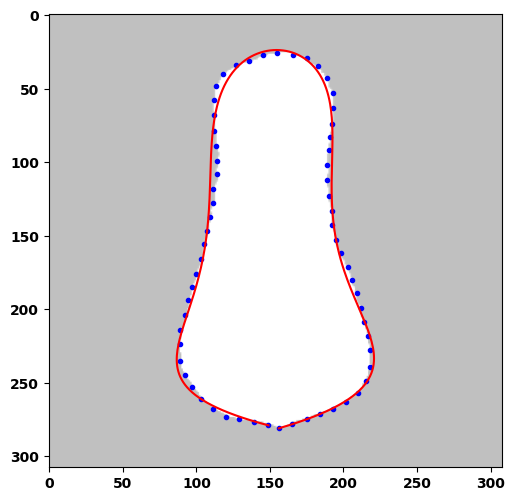

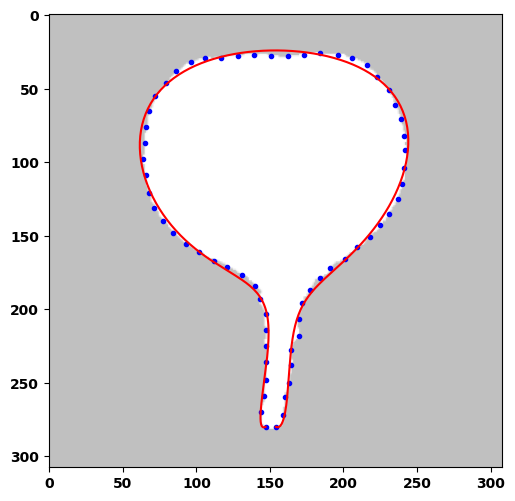

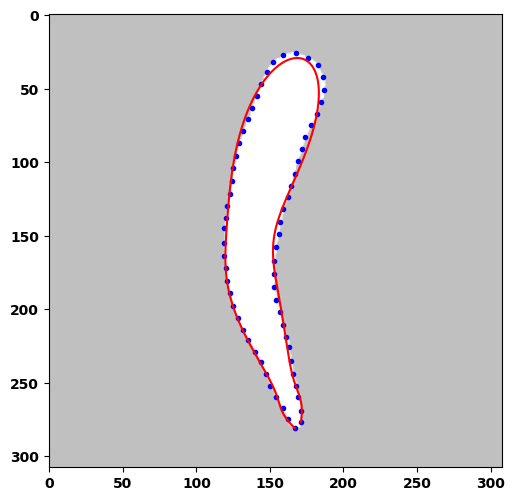

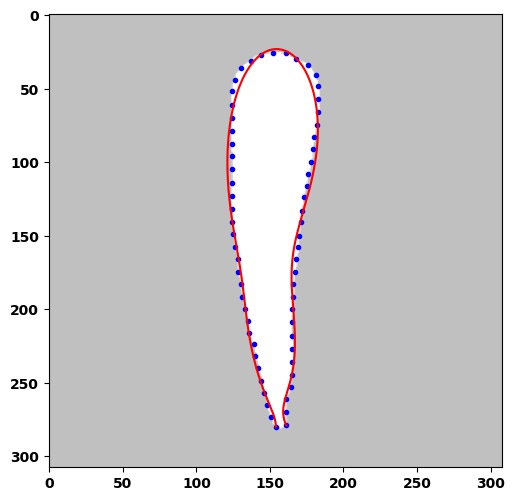

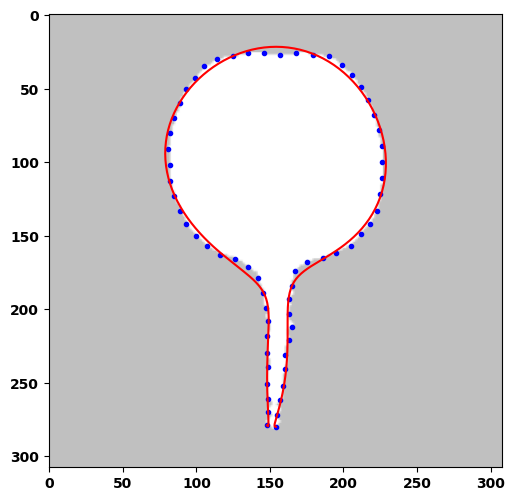

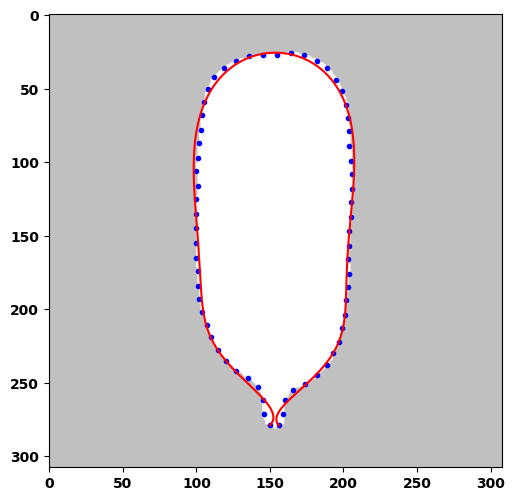

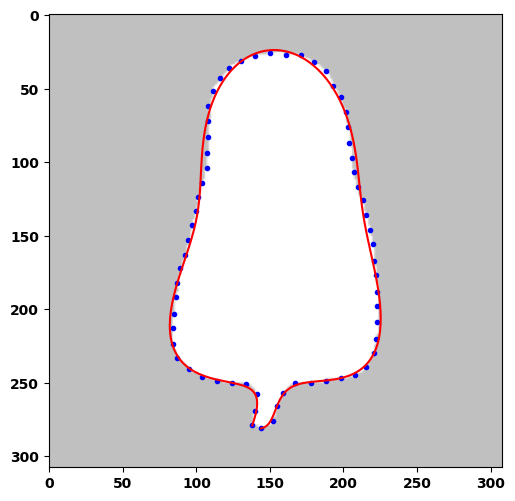

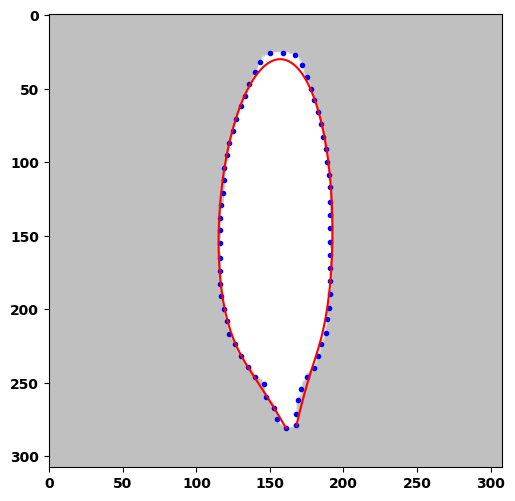

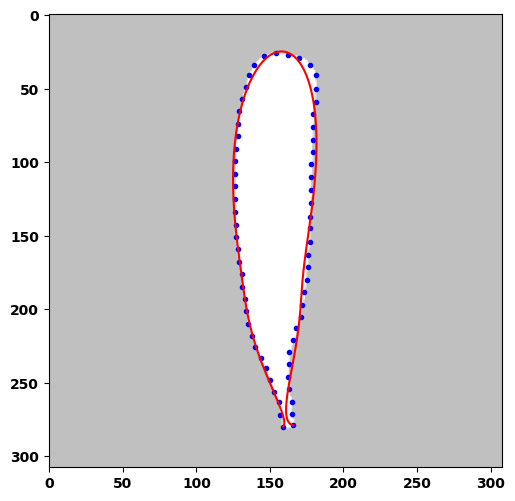

In [21]:
rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 3000 # dummy
Ims =[0,1,2,3,4,5,6,7,8]
Ns =[7,10,11,10,11,9,12,7,9]
erth = [5,5,5,5,5,5,5,5,5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode1',mode=1,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=1000,pat=200,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

2022-02-15 23:33:28.766332


loss,█▇▆▅▄▄▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,5.94023


............E

Matrix([[144.0*t**12 + 220.820476665923*t**11*(12 - 12*t) - 9058.1627440665*t**10*(1 - t)**2 + 323101.371834629*t**9*(1 - t)**3 - 791027.392647235*t**8*(1 - t)**4 + 784009.676296682*t**7*(1 - t)**5 + 1865575.27202113*t**6*(1 - t)**6 - 2847503.83204392*t**5*(1 - t)**7 + 1581032.41222041*t**4*(1 - t)**8 - 276561.650901249*t**3*(1 - t)**9 + 17838.478460035*t**2*(1 - t)**10 + 1763.54071490438*t*(1 - t)**11 + 138.0*(1 - t)**12], [281.0*t**12 + 258.823554770998*t**11*(12 - 12*t) - 13401.4246989891*t**10*(1 - t)**2 + 546802.15091408*t**9*(1 - t)**3 - 2905407.71471473*t**8*(1 - t)**4 + 7873643.41976125*t**7*(1 - t)**5 - 10337059.480079*t**6*(1 - t)**6 + 6596832.41806645*t**5*(1 - t)**7 - 1952156.03659873*t**4*(1 - t)**8 + 269527.89202491*t**3*(1 - t)**9 + 14034.9404296335*t**2*(1 - t)**10 + 2290.54850284159*t*(1 - t)**11 + 279.0*(1 - t)**12]])
img 6: err_th: 2.000000, steps:11, minerror: 1.9625019640, etime: 27.88712
2022-02-15 23:33:56.669078


loss,█▆▅▄▄▃▃▂▂▂▁▁
loss,1.9625


......................................E

Matrix([[144.0*t**12 + 216.102112204866*t**11*(12 - 12*t) - 6778.91031117656*t**10*(1 - t)**2 + 278811.034446009*t**9*(1 - t)**3 - 483570.840184466*t**8*(1 - t)**4 - 173377.660141862*t**7*(1 - t)**5 + 3352143.78602059*t**6*(1 - t)**6 - 4090255.31131904*t**5*(1 - t)**7 + 2142357.55686574*t**4*(1 - t)**8 - 402089.711648701*t**3*(1 - t)**9 + 29499.2667438324*t**2*(1 - t)**10 + 1549.02810445543*t*(1 - t)**11 + 138.0*(1 - t)**12], [281.0*t**12 + 266.911105421388*t**11*(12 - 12*t) - 15382.5847682684*t**10*(1 - t)**2 + 551858.669627725*t**9*(1 - t)**3 - 2822153.00874503*t**8*(1 - t)**4 + 7520670.64724225*t**7*(1 - t)**5 - 10154086.3795204*t**6*(1 - t)**6 + 7032071.39902809*t**5*(1 - t)**7 - 2426026.56493135*t**4*(1 - t)**8 + 408692.296450773*t**3*(1 - t)**9 - 125.104044248927*t**2*(1 - t)**10 + 2768.41966483559*t*(1 - t)**11 + 279.0*(1 - t)**12]])
img 6: err_th: 1.000000, steps:37, minerror: 0.9815085108, etime: 65.24911
2022-02-15 23:35:01.918186


loss,█▇▆▆▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
loss,0.98151


...................E

Matrix([[144.0*t**11 + 263.813400585752*t**10*(11 - 11*t) - 19742.6868995365*t**9*(1 - t)**2 + 403565.123687752*t**8*(1 - t)**3 - 1469641.60704886*t**7*(1 - t)**4 + 3065368.37393003*t**6*(1 - t)**5 - 2630122.65691546*t**5*(1 - t)**6 + 1112925.49331361*t**4*(1 - t)**7 - 146720.965629213*t**3*(1 - t)**8 + 4137.27509121853*t**2*(1 - t)**9 + 1827.15007210077*t*(1 - t)**10 + 138.0*(1 - t)**11], [281.0*t**11 + 151.496164200097*t**10*(11 - 11*t) + 23754.3892310731*t**9*(1 - t)**2 + 51023.4021084855*t**8*(1 - t)**3 - 319674.320083295*t**7*(1 - t)**4 + 1017332.26271209*t**6*(1 - t)**5 - 1433451.49850151*t**5*(1 - t)**6 + 900022.056128733*t**4*(1 - t)**7 - 239865.14616593*t**3*(1 - t)**8 + 48323.2867976901*t**2*(1 - t)**9 + 1063.26761411102*t*(1 - t)**10 + 279.0*(1 - t)**11]])
img 6: err_th: 2.000000, steps:18, minerror: 1.9938610942, etime: 33.46821
2022-02-15 23:35:35.386399


loss,█▆▅▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁
loss,1.99386


........................................................E

Matrix([[144.0*t**11 + 265.054026108726*t**10*(11 - 11*t) - 25255.8377779148*t**9*(1 - t)**2 + 452008.852554468*t**8*(1 - t)**3 - 1632362.80743403*t**7*(1 - t)**4 + 3353447.56939296*t**6*(1 - t)**5 - 2947905.37317862*t**5*(1 - t)**6 + 1299506.17043943*t**4*(1 - t)**7 - 196149.499093937*t**3*(1 - t)**8 + 9105.25200684907*t**2*(1 - t)**9 + 1760.88563928385*t*(1 - t)**10 + 138.0*(1 - t)**11], [281.0*t**11 + 181.11522974442*t**10*(11 - 11*t) + 16326.1957726821*t**9*(1 - t)**2 + 96924.4046864004*t**8*(1 - t)**3 - 323841.073250802*t**7*(1 - t)**4 + 573221.961922536*t**6*(1 - t)**5 - 602423.325271283*t**5*(1 - t)**6 + 358882.340476559*t**4*(1 - t)**7 - 107641.714959055*t**3*(1 - t)**8 + 36621.1652286196*t**2*(1 - t)**9 + 1398.6861772229*t*(1 - t)**10 + 279.0*(1 - t)**11]])
img 6: err_th: 1.000000, steps:55, minerror: 0.9941284709, etime: 77.72740
2022-02-15 23:36:53.118801


loss,█▆▆▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.99413


....................................................................................................
....................................................................................................
.....................................................................................^...E

Matrix([[144.0*t**11 + 239.281030458774*t**10*(11 - 11*t) - 19388.378553043*t**9*(1 - t)**2 + 400702.251260156*t**8*(1 - t)**3 - 1435385.25351451*t**7*(1 - t)**4 + 3027462.51595988*t**6*(1 - t)**5 - 2755131.17314923*t**5*(1 - t)**6 + 1267540.27549859*t**4*(1 - t)**7 - 199402.663952314*t**3*(1 - t)**8 + 10135.0003502193*t**2*(1 - t)**9 + 1740.44356893423*t*(1 - t)**10 + 138.0*(1 - t)**11], [281.0*t**11 + 247.27414513321*t**10*(11 - 11*t) + 1281.01947870158*t**9*(1 - t)**2 + 190828.294268619*t**8*(1 - t)**3 - 473274.764659082*t**7*(1 - t)**4 + 357696.144084061*t**6*(1 - t)**5 + 20758.1513902309*t**5*(1 - t)**6 - 76288.1465276028*t**4*(1 - t)**7 + 2547.07764400828*t**3*(1 - t)**8 + 26092.0380323533*t

loss,█▆▄▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.65


....................................................................................................
..........E

Matrix([[144.0*t**10 + 221.27702514632*t**9*(10 - 10*t) + 8131.89245276852*t**8*(1 - t)**2 + 83333.1344806725*t**7*(1 - t)**3 - 237359.271520131*t**6*(1 - t)**4 + 629414.694923455*t**5*(1 - t)**5 - 527948.473986684*t**4*(1 - t)**6 + 234540.742967528*t**3*(1 - t)**7 - 32006.2261556987*t**2*(1 - t)**8 + 2312.87965856074*t*(1 - t)**9 + 138.0*(1 - t)**10], [281.0*t**10 + 136.264419400462*t**9*(10 - 10*t) + 24116.8763164258*t**8*(1 - t)**2 - 25011.1020408625*t**7*(1 - t)**3 + 101563.667571028*t**6*(1 - t)**4 - 254069.855385372*t**5*(1 - t)**5 + 265414.446960674*t**4*(1 - t)**6 - 121420.706670988*t**3*(1 - t)**7 + 31418.1073786876*t**2*(1 - t)**8 + 1247.52713266523*t*(1 - t)**9 + 279.0*(1 - t)**10]])
img 6: err_th: 2.000000, steps:109, minerror: 1.9834821340, etime: 121.79730
2022-02-15 23:45:02.688292


loss,█▅▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,1.98348


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
................^^^^^^^^^.....................^...^..^...^..^^..^^.^^..^^..^^.^^^^.^.^^^^^.......^..
..^..^^.^.....................................^......^^^^^..^^^^^^^.^......^.^^^.^^..^^^.......^^..^
^..^^.....^.^^^^^^.^.^^.^.^^.^.^^..^.^^.^^^^..^..^..^..^..^^.^..^^.^^..^..^^^^^..^^..^...^...^..^^^.
^.^.^^^^^^^^^^^^^^^^^^...^^^..^^.^^^^^^^^^^^..^^^^^^.^^^^...^..^.^..^^...^^..^^..^^^^^^^^^^

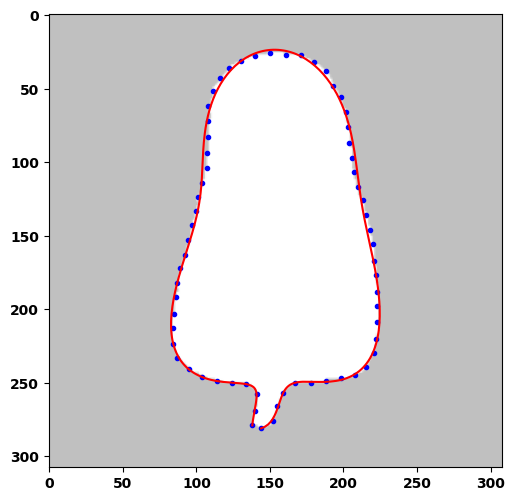

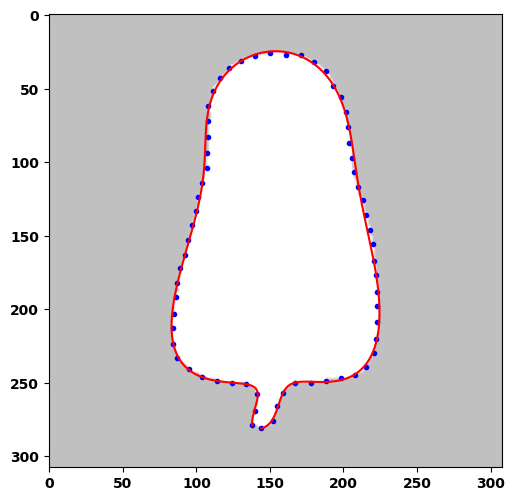

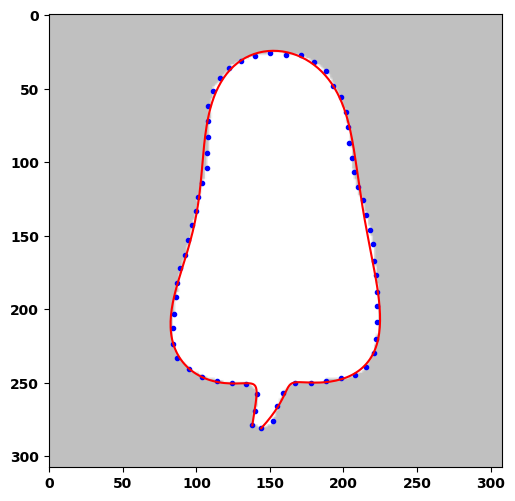

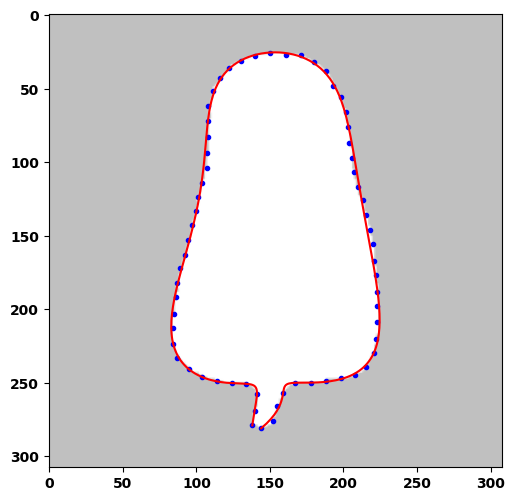

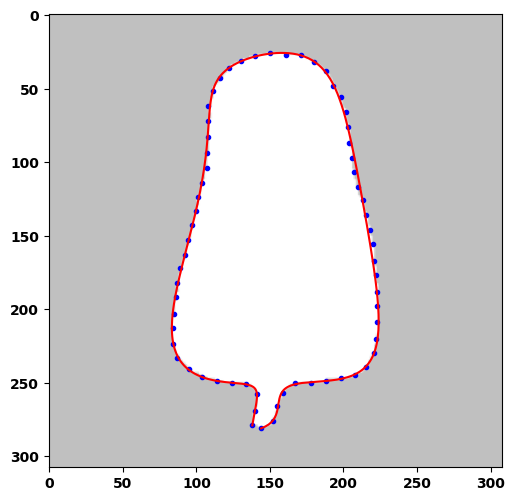

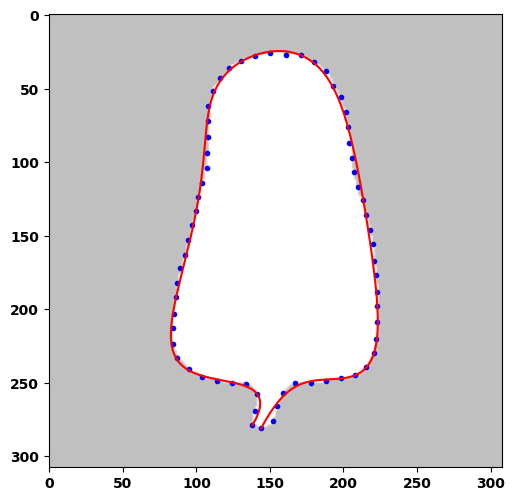

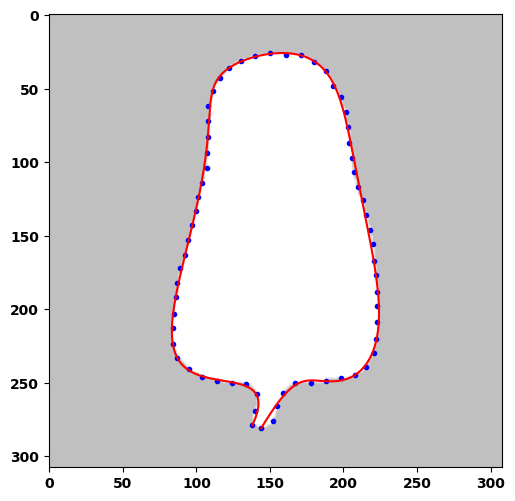

In [17]:
rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 3000 # dummy
Ims =[6,6,6,6,6,6,6]
Ns =[12,12,11,11,11,10,10]
erth = [2.0,1.0,2.0,1.0,0.65,2.0,1.0,2.0,1.0,2.0,1.0,0.65]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode1',mode=1,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=1000,pat=200,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

2022-02-15 22:52:34.749180


loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,2.40796


...................E

Matrix([[156.0*t**9 + 143.292208609735*t**8*(9 - 9*t) + 20770.5766199542*t**7*(1 - t)**2 - 67909.2834777358*t**6*(1 - t)**3 + 248659.707312904*t**5*(1 - t)**4 - 207526.751178679*t**4*(1 - t)**5 + 92116.8515125154*t**3*(1 - t)**6 - 9853.4516037611*t**2*(1 - t)**7 + 1479.35168130424*t*(1 - t)**8 + 150.0*(1 - t)**9], [279.0*t**9 + 190.283002804827*t**8*(9 - 9*t) + 11132.5268643174*t**7*(1 - t)**2 - 6434.17976478494*t**6*(1 - t)**3 + 21798.9880098449*t**5*(1 - t)**4 - 47608.1707312377*t**4*(1 - t)**5 + 22283.1869559614*t**3*(1 - t)**6 + 6947.42079531414*t**2*(1 - t)**7 + 1744.11436187436*t*(1 - t)**8 + 279.0*(1 - t)**9]])
img 5: err_th: 2.000000, steps:18, minerror: 1.9949942266, etime: 25.72397
2022-02-15 22:53:00.473146


loss,█▄▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
loss,1.99499


....................................................................................................
..E

Matrix([[156.0*t**9 + 161.81111770337*t**8*(9 - 9*t) + 16510.5914093738*t**7*(1 - t)**2 - 39739.0956712843*t**6*(1 - t)**3 + 179546.514522912*t**5*(1 - t)**4 - 140868.668042362*t**4*(1 - t)**5 + 65787.7272851992*t**3*(1 - t)**6 - 5553.08449527489*t**2*(1 - t)**7 + 1231.19632122186*t*(1 - t)**8 + 150.0*(1 - t)**9], [279.0*t**9 + 160.764471539812*t**8*(9 - 9*t) + 16971.2032921467*t**7*(1 - t)**2 - 31288.0724476913*t**6*(1 - t)**3 + 27005.5769975616*t**5*(1 - t)**4 - 375.257798896047*t**4*(1 - t)**5 - 17657.4786566205*t**3*(1 - t)**6 + 14632.6893001171*t**2*(1 - t)**7 + 1324.29385408587*t*(1 - t)**8 + 279.0*(1 - t)**9]])
img 5: err_th: 1.000000, steps:101, minerror: 0.9969996423, etime: 92.86735
2022-02-15 22:54:33.340494


loss,█▅▅▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.997


....................................................................................................
.E

Matrix([[156.0*t**8 + 221.689531665999*t**7*(8 - 8*t) + 4808.84143808791*t**6*(1 - t)**2 + 14747.7674338769*t**5*(1 - t)**3 + 20757.1723801154*t**4*(1 - t)**4 - 9348.64071226802*t**3*(1 - t)**5 + 6441.15973606884*t**2*(1 - t)**6 + 441.549794741436*t*(1 - t)**7 + 150.0*(1 - t)**8], [279.0*t**8 + 78.9102902577416*t**7*(8 - 8*t) + 26135.1621948472*t**6*(1 - t)**2 - 91024.1372176341*t**5*(1 - t)**3 + 136847.049993273*t**4*(1 - t)**4 - 95820.2893175565*t**3*(1 - t)**5 + 28802.7989159709*t**2*(1 - t)**6 + 217.045060680511*t*(1 - t)**7 + 279.0*(1 - t)**8]])
img 5: err_th: 2.000000, steps:100, minerror: 1.9936110733, etime: 74.34205
2022-02-15 22:55:47.685544


loss,█▅▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,1.99361


....................................................................................................
....................................................................................................
..................................................E

Matrix([[156.0*t**8 + 210.481886641719*t**7*(8 - 8*t) + 5507.86404564302*t**6*(1 - t)**2 + 15947.371480026*t**5*(1 - t)**3 + 9941.48983451396*t**4*(1 - t)**4 + 2744.31206594705*t**3*(1 - t)**5 + 2638.91025985108*t**2*(1 - t)**6 + 748.566059741038*t*(1 - t)**7 + 150.0*(1 - t)**8], [279.0*t**8 + 87.8198929407125*t**7*(8 - 8*t) + 26185.4100132522*t**6*(1 - t)**2 - 99893.527534812*t**5*(1 - t)**3 + 151156.069704947*t**4*(1 - t)**4 - 98429.7796219972*t**3*(1 - t)**5 + 25807.8800251599*t**2*(1 - t)**6 + 536.836313637346*t*(1 - t)**7 + 279.0*(1 - t)**8]])
img 5: err_th: 1.000000, steps:249, minerror: 0.9976672514, etime: 174.31186
2022-02-15 22:58:42.000488


loss,█▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.99767


........^^^.........................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...^....^^......................................................................................^...
..............................^........^^^^.^^^.....................................................
..............^..^...................................^^^.^...^^..^..^^^^^^.^^^.............

loss,█▇▆▅▄▄▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,5.94023


........^^^.........................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...^....^^......................................................................................^...
..............................^........^^^^.^^^.....................................................
..............^..^...................................^^^.^...^^..^..^^^^^^.^^^.............

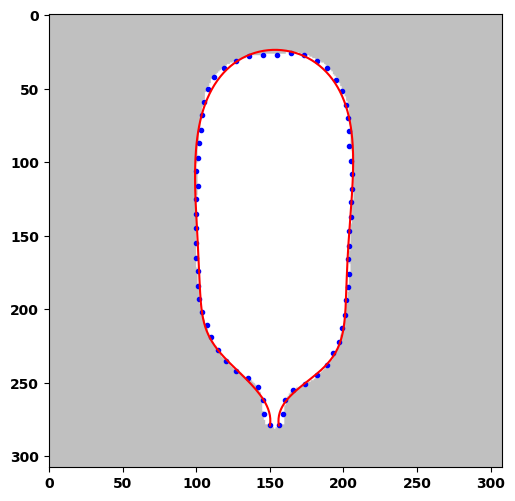

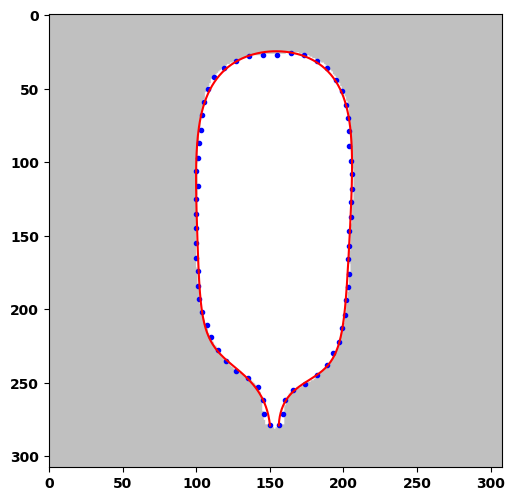

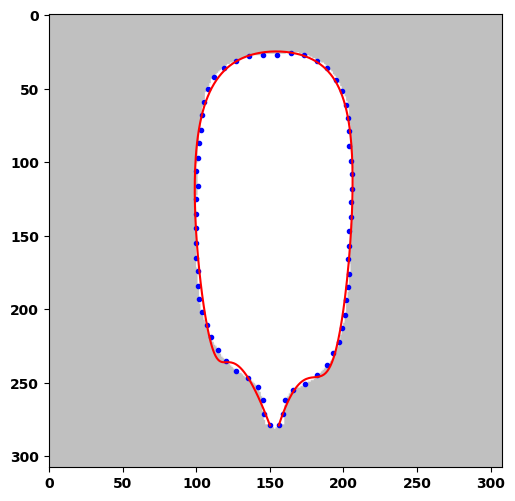

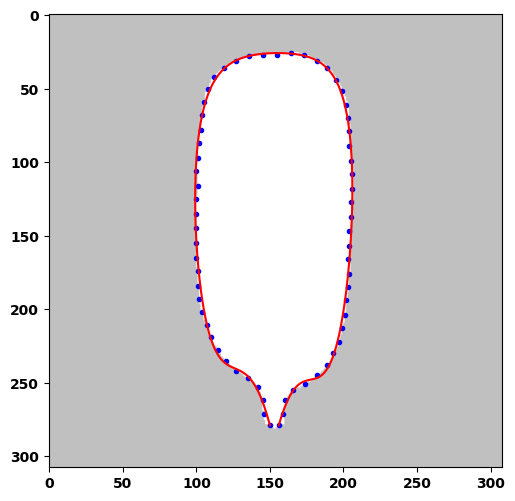

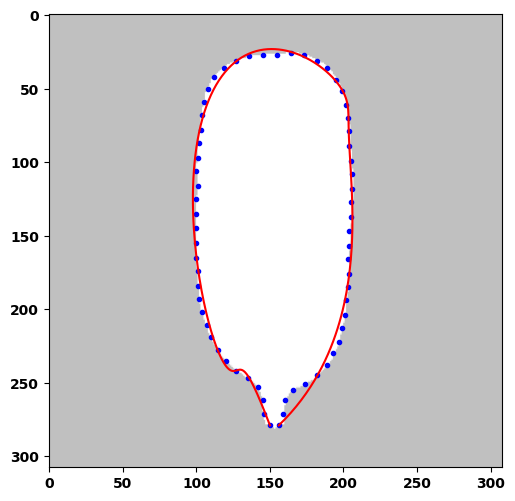

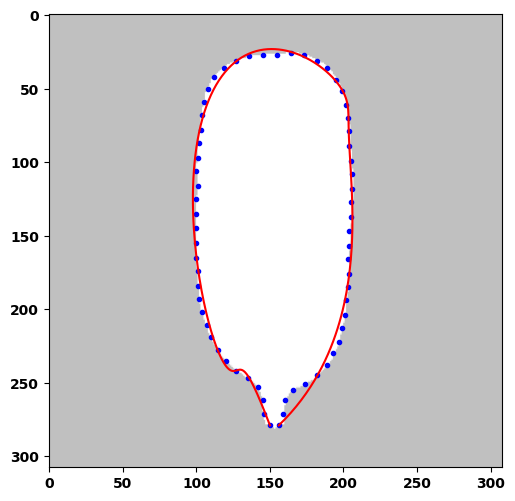

In [16]:
rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 3000 # dummy
Ims =[5,5,5,5,5,5]
Ns =[9,9,8,8,7,7]
erth = [2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,0.65]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode1',mode=1,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=1000,pat=200,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

2022-02-15 22:01:06.058932


loss,█▇▆▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.64221


......................................E

Matrix([[154.0*t**11 + 156.370831385315*t**10*(11 - 11*t) + 14089.4380194232*t**9*(1 - t)**2 - 27661.7987850494*t**8*(1 - t)**3 + 271649.253760026*t**7*(1 - t)**4 + 47116.0588417921*t**6*(1 - t)**5 + 27612.887483429*t**5*(1 - t)**6 - 52156.4931115441*t**4*(1 - t)**7 + 28595.3592035134*t**3*(1 - t)**8 + 7885.70670974168*t**2*(1 - t)**9 + 1666.02521154796*t*(1 - t)**10 + 148.0*(1 - t)**11], [280.0*t**11 + 277.179143041418*t**10*(11 - 11*t) - 11765.2364336476*t**9*(1 - t)**2 + 78732.904154052*t**8*(1 - t)**3 + 275105.65454102*t**7*(1 - t)**4 - 916432.027361507*t**6*(1 - t)**5 + 1055180.76400946*t**5*(1 - t)**6 - 699274.410934456*t**4*(1 - t)**7 + 285451.363165531*t**3*(1 - t)**8 - 27694.6170045667*t**2*(1 - t)**9 + 3194.78539604091*t*(1 - t)**10 + 279.0*(1 - t)**11]])
img 4: err_th: 2.000000, steps:37, minerror: 1.9965240748, etime: 56.59705
2022-02-15 22:02:02.655987


loss,█▇▇▆▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
loss,1.99652


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..................................E

Matrix([[154.0*t**11 + 168.09755562379*t**10*(11 - 11*t) + 12158.5350055228*t**9*(1 - t)**2 - 25603.4024035754*t**8*(1 - t)**3 + 374135.634940658*t**7*(1 - t)**4 - 289904.327746905*t**6*(1 - t)**5 + 304478.586080193*t**5*(1 - t)**6 - 46488.5315942037*t**4*(1 - t)**7 - 6089.14320911671*t**3*(1 - t)**8 + 9578.9090939405*t**2*(1 - t)**9 + 1653.92329435994*t*(1 - t)**10 + 148.0*(1 - t)**11], [280.0*t**11 + 217.0970940088*t**10*(11 - 11*t) - 6163.60330605185*t**9*(1 - t)**2 + 42625.7701169385*t**8*(1 - t)**3 + 517066.700646084*t**7*(1 - t)**4 - 1805248.15113

loss,█▅▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.9989


.................................................................................E

Matrix([[154.0*t**10 + 163.416238942633*t**9*(10 - 10*t) + 11023.0339026246*t**8*(1 - t)**2 - 20275.576572674*t**7*(1 - t)**3 + 205685.529791175*t**6*(1 - t)**4 + 699.456203122649*t**5*(1 - t)**5 - 80266.9225443679*t**4*(1 - t)**6 + 35494.1989319408*t**3*(1 - t)**7 + 4568.91149791625*t**2*(1 - t)**8 + 1572.99189103479*t*(1 - t)**9 + 148.0*(1 - t)**10], [280.0*t**10 + 265.050538604859*t**9*(10 - 10*t) - 23538.3838617508*t**8*(1 - t)**2 + 211876.081166142*t**7*(1 - t)**3 - 404408.626045301*t**6*(1 - t)**4 + 440937.46758481*t**5*(1 - t)**5 - 371632.028766644*t**4*(1 - t)**6 + 181628.599210289*t**3*(1 - t)**7 - 17358.0632397913*t**2*(1 - t)**8 + 2446.06206252772*t*(1 - t)**9 + 279.0*(1 - t)**10]])
img 4: err_th: 2.000000, steps:80, minerror: 1.9991284583, etime: 92.15235
2022-02-15 22:12:36.758032


loss,█▆▅▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,1.99913


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.E

Matrix([[154.0*t**10 + 188.066174218899*t**9*(10 - 10*t) + 2964.30617228349*t**8*(1 - t)**2 + 58980.189922591*t**7*(1 - t)**3 + 43026.9380353252*t**6*(1 - t)**4 + 9692.18889792826*t**5*(1 - t)**5 + 54078.9536433054*t**4*(1 - t)**6 - 26047.6579587901*t**3*(1 - t)**7 + 9615.97647815746*t**2*(1 - t)**8 + 1461.75273929317*t*(1 - t)**9 + 148.0*(1 - t)**10], [280.0*t**10 + 229.905191188183*t**

loss,█▅▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.99993


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................^..^............
................................^^..^..^..^...^...^........................................^^^..^...
...^..^.^^.^^..^^..^.......................^...^..^....^..^^..^....^.^^.^^^^^^.....^^.^............^
^^.^.....^^..^.^^^.....^^^.^..^^^..^^^....^..^..........^.^.^.^.^^...^.^^.^^^..^^.^..^....^^^..^....
...^^^^.^..^.^^.^^..^^^...^.^.^.^.^^^^.^^^....^^^.^^.^.^^^.^........^^.^....^.^.^.^^^^..^.....^.....
^^.^..^..^.^^^^^.^^^^^^.^^..^.^..^^^^.^^..^^^^^^.....^^...^..^^^^..^^^^^^^.^^^^^.^^^.....^^^....^^..
..^^^...^^....^^^...^^^^^.^^^^^.^^^^^^^^...^...^.^^^^^^^.^^^^^^^......^^^.^...^^^^^^.^.^^.^

loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,2.39684


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................^..^............
................................^^..^..^..^...^...^........................................^^^..^...
...^..^.^^.^^..^^..^.......................^...^..^....^..^^..^....^.^^.^^^^^^.....^^.^............^
^^.^.....^^..^.^^^.....^^^.^..^^^..^^^....^..C

Matrix([[154.0*t**9 + 164.262354745681*t**8*(9 - 9*t) + 10286.7711754008*t**7*(1 - t)**2 - 39502.0538308837*t**6*(1 - t)**3 + 248705.290430207*t**5*(1 - t)**4 - 201102.759071764*t**4*(1 - t)**5 + 58533.1270524929*t**3*(1 - t)**6 + 805.86539667167*t**2*(1 - t)**7 + 1477.74626079334*t*(1 - t)**8 + 148.0*(1 - t)**9], [280.0*t**9 + 201.349655235504

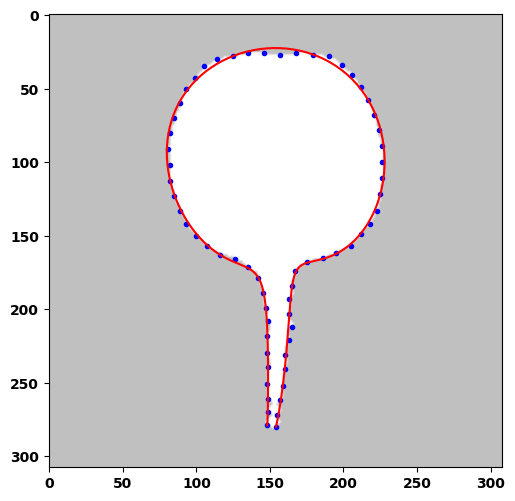

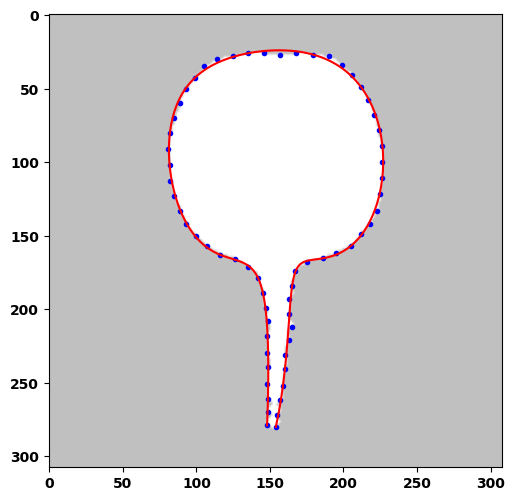

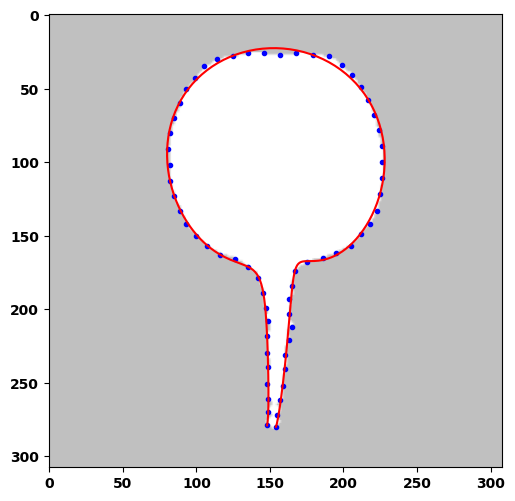

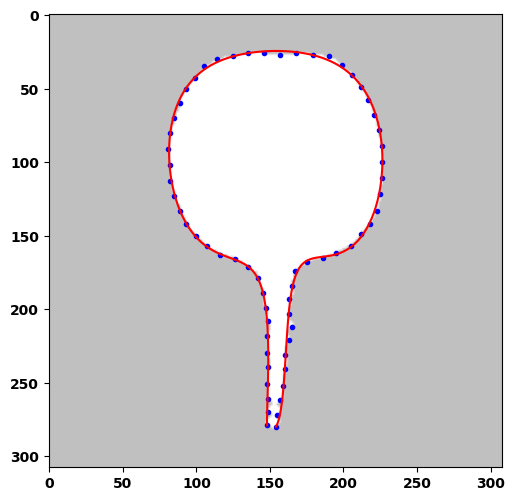

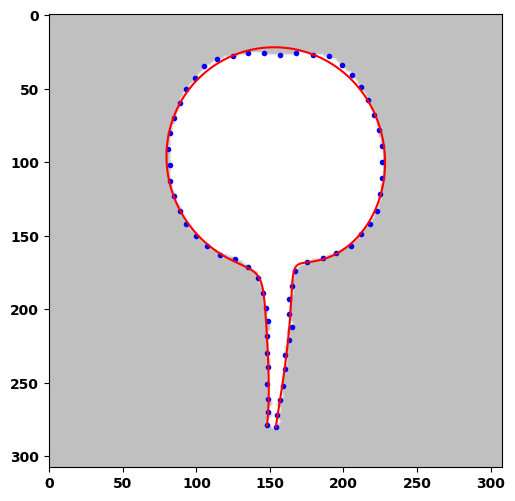

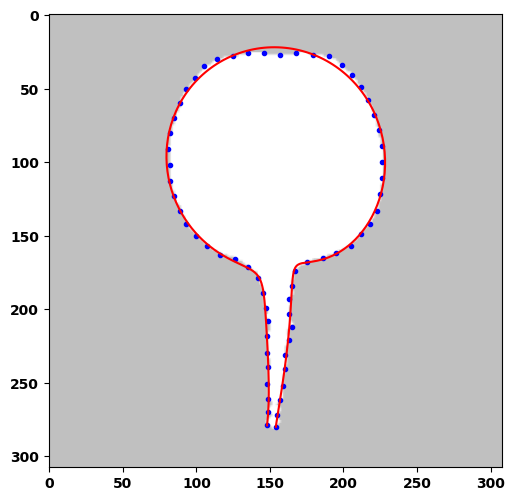

In [15]:
rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 3000 # dummy
Ims =[4,4,4,4,4,4]
Ns =[11,11,10,10,9,9]
erth = [2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,0.65]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode1',mode=1,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=1000,pat=200,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

# fit1

In [ ]:
#### rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 30000 # dummy
Ims =[0,1,2,3,3,4,5,6,7,8]
Ns =[7,10,11,7,10,11,9,12,7,9]
erth = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode1',mode=1,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=3000,pat=3000,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

# fit1T mode 1

In [1]:
#### rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 30000 # dummy
Ims =[1]
Ns =[10]
erth = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode1',mode=1,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=3000,pat=3000,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

NameError: name 'rd' is not defined

2022-02-16 20:57:35.119833


loss,█▇▅▄▄▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
loss,0.49911


.....
CP 5.0, steps:4, etime: 2.95195 err: 4.8162808972
...
CP 2.0, steps:7, etime: 4.44246 err: 1.5569179479
........
CP 1.0, steps:15, etime: 8.49187 err: 0.9806954793
....................................................................................
..
CP 0.65, steps:101, etime: 51.44073 err: 0.6490425636
..................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................

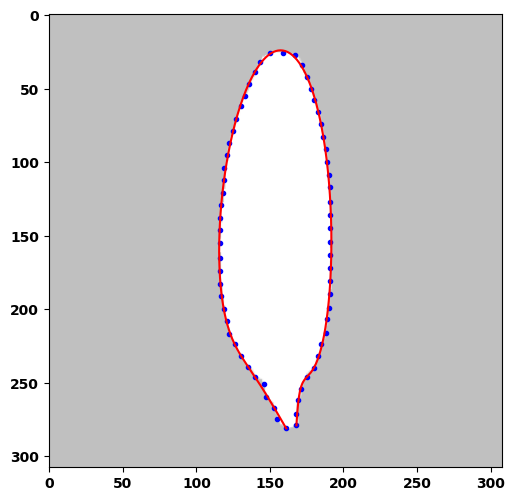

In [22]:
#### rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 30000 # dummy
Ims =[7]
Ns =[7,9]
erth = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode1',mode=1,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=3000,pat=3000,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

# fit1T mode 0 retest

2022-02-17 20:08:45.537201


loss,█▆▅▅▇▄▅▄▄▄▄▂▂▂▂▂▁▂▂▁▂▂▂▃█▂▁▁▃▁▁▁▁▁▁▁▁▂▁▂
loss,7.25891


^^^^^^^^^^.^..^...^......^.......................................^^^^^........................^^^^^^
^^...
CP 5.0, steps:104, etime: 26.93257 err: 4.9986710959
...^^^^^^^^^^^^^....^^^^^^^^.^..................^^^^^^^.^^^^^^^^^^.^^.^^^^^^^.............^.^^^
^^^^^^^^^^^............................^^^^^^^^^^^^.^^.^.............................^.^^^^^^^^^^^^^
^^.^......^.................................^.^^^^^^^^^^^^^^.^^^^^^^^^....^^^^^^^^^....^^^^^^^^^....
^^^^^^^^^.^^^^^^^^^^^^^.^.^^^^^^^^...^^^^^^^^^.....^^^^^^^^^.....^^^^^^^^^^^^^^^^^^^^^^^^..^^^^^^^^.
.....^^^^^^.................
CP 2.0, steps:527, etime: 112.56219 err: 1.9859379724
.......^.^.^^^^^^^^^^^^^^^^^^.^.^^^^^^^^^^....^^^^......................
.^^^^^^^...^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.
.............................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

loss,▅▄▄▃▃▃▄█▂▃▂▁▃▂▂▂▁▄▃▁▁▁▁▂▁▁▁▂▂▂▁▃▂▁▁▁▂▂▁▁
loss,0.8892


^^^^^^^.^.^..^.^.^^.^..^..^..^.....................................................^^^^^^^^.^^^^^^^.
.......^^^^^.^^^^..^^^^^^^^^^.
CP 5.0, steps:129, etime: 34.11786 err: 4.9931908736
^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.........^^^^^^
^^^^^^^^^^^^...^^.....^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^...^.....^^.....^^....^^..^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^...........^^^^^^^^^^^^^^^^^^^^^
^^^^^...................^^^^^^^^^^^.^^^^^^^^^^^^^^^^....................................^^^^^^^^^^^^
^^^^^^^^.........
CP 2.0, steps:516, etime: 124.01149 err: 1.9942109911
.^^^^^^^^^.^^.^......^^^^^^^^^^^^^^^^^^^^^^^^^^^.......^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^...^^^^^^^^^^^^^^^.........^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^...........
.............^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^...^^^^^^

loss,▃▃▅▂▂▂▂▁▁▂▁▁▁▂▁▁▁▅▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,1.84723


^^^^^^^.^^^^^^.
CP 5.0, steps:14, etime: 9.07208 err: 3.9256421426
^.^^.^^.^^.^..^..............................................^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.........................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
....^^............^.........^^^^^^^^^^^^^^^^...^^^..^^^............................^^^^^^^^^^^^^^.^^
^.....^................................^^^^^^^^^^^^^^.....^^........................................
^^^^^^^^^^^^^^^^.^................................................^^^^^^^^^^^^^^^^^.
CP 2.0, steps:483, etime: 129.14870 err: 1.9913330322
^.^.^.^.^.^.^.^.
^.^..........................^^^^^^^^^^^^^^^^^^^^^^^^^.........................^.^^^^^^^^^^.........
..............................^^^^^^^^^^^^^^^^^^^^^......
CP 1.0, steps:656, etime: 173.61659 err: 0.9995060210
.................^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.....^^^^.^...........^^...^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

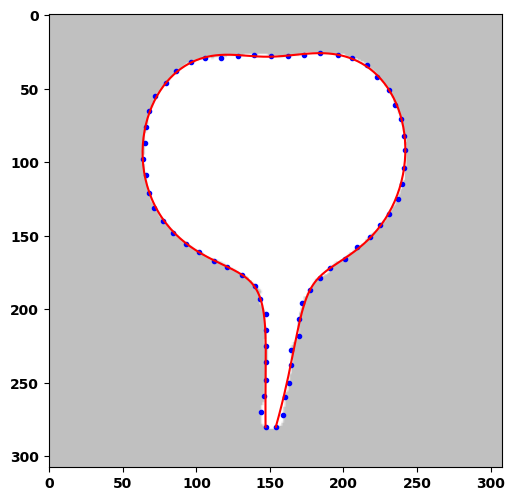

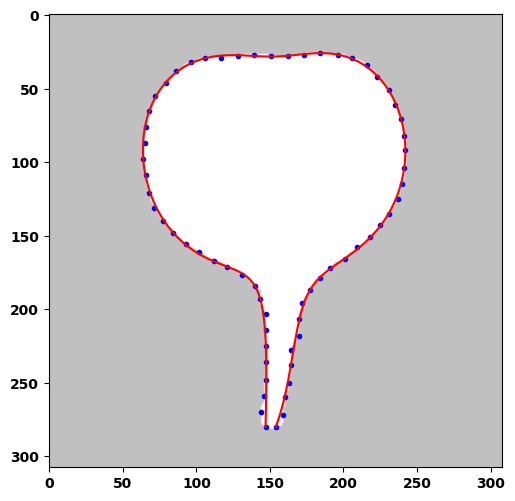

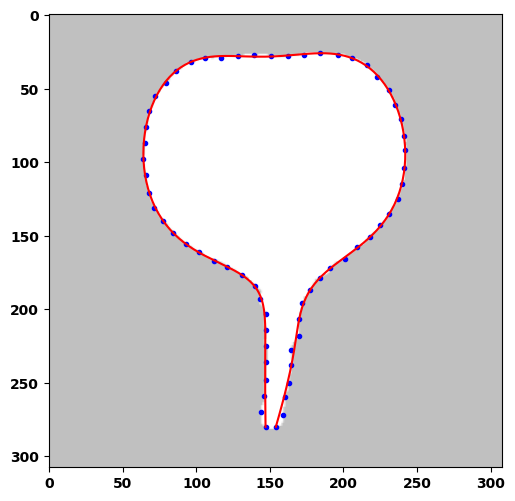

In [10]:
# rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 30000 # dummy
Ims =[1,1,1]
Ns =[10,11,12,11,7,8,11,12, 9,10,11,12,7,8,9]
erth = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode0',mode=0,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=3000,pat=3000,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

2022-02-17 20:59:33.538014


loss,▆█▅▅▄▄▄▆▂▃▁▁▁▁▁▂▁▂▂▁▂▁▂▂▂▁▃▂▂▁█▁▁▁▇▁▃▂▁▃
loss,1.38683


^^^^^^^^^.^^^^.
CP 5.0, steps:14, etime: 8.76273 err: 4.5141702499
^....^..^.
CP 2.0, steps:24, etime: 11.04315 err: 1.9799834933
.^....................................................^^^^^^^^^^^.^^..^.^^.
^......................^^^^^^^^^^.^^^^.^^^^.........................^^^^^^^^^^^.^^^^^^.^.^.^.^......
................^^^^^^^^^^^^^^.^.^.^.^.^.^..........................^^^^^^^^^^^^^^^^^^.^.^.^........
.........................^^^^^^^^^^^^^^^^^^^.^.^^^^.^.^^^^.^.^^.^.^^.^.^^.^.^^.^..^.^..^^^^^^^^^^^^^
^^^^^.^^^^^.^^.^^.^^.^^.^^.^^^^^^.^^.^^..^..^^..^..^^^^^^^^^^^^^^^^^^^^^^^^.^.^^^^^^^^.^.^^^^^^.^^^^
^^^^^^^^^^^^^^^^^^^^^^.^.^.^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^.^.^^^.^.^.^.^.^.^^^^^^^^^^^^^^^^^^.^.^^^^^^^^^^.^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^.^
^^^^^^^^^^^^^^^.^.^.^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▁▁▁▁▁█▁▁▁▃▁▂▁▁▁▁▁▁▁▁▁▁▁
loss,0.49497


^^^.^.^.^.^.^..^.^..^..............................................^^^.
CP 5.0, steps:70, etime: 11.72236 err: 4.9868461575
^^^^.^^......................
.....................^^^^^^^.^^^...........................................................^^^^^^^^.
^^.^.^......................................................^^^^^.^^^^.^.^.^........................
.................................^^^^^^^^^^.^^^^.^.^................................................
........^^^^^^^^^^.^^^^^^.^.^^.^..^.^..^....^..^....^..^...........................^^^^^^^^^^^.^^^..
.........................^^^^..
CP 2.0, steps:530, etime: 72.32385 err: 1.9953038641
..^^....................................^^^^^^^.^^^^^^^.^^.^..^......
...............................^^^^^^^^^^^^^^^^^.^.^.^..............................................
................^^^^^^^^^^^^^^^^^.^....^............................................................
...^^^^^^^^^^^^^^^^^^....
CP 1.0, steps:824, etime: 110.79338 err: 0.9917025021
^.^..

loss,█▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▂▁▂▁▁▁▂▁▂▁▁▁▁
loss,0.49906


^^^^^.^.^^^^.^.^.^..^..^............................................................................
..................................................................................^^^^.^^^^.^.^.....
................
CP 5.0, steps:215, etime: 35.26666 err: 4.9991103757
................................^^^^^^^^.^.^........................................
................^^^^^^^^^^.^.^.^.^.^...^...^..........^.^.^.^.^.^.^.^.^^^^.^.^.^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^.^^^^^^.^.^^^^^^.^^^^^^.^^^^^^.
CP 2.0, steps:460, etime: 72.45615 err: 1.9778931454
^^^^^^.^^^^^^.^^^^.^^^^.^^^^.^^^^^^^^^^
^^^^.^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^^^^.^^^^.^^^^.^^^^.^^^^.^^
^^.^^^^.^^^^^^^^^^^^^^^^^.^^^^.^^^^^^^.^^^^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^.^^^^^^^^^^^^^^^^^^^^^^^.^^^
^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^^^^^^.^^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

loss,█▇▆▅█▄▂▃▂▂▂▂▁▁▁▄▁▁▁▁▁▁▁▁▁▁▁▂▂▂▁▁▁▃▁▁▁▂▁▁
loss,1.76502


^^^^^^^^^^^.^.^.^.^..^.^............................
CP 5.0, steps:51, etime: 17.17714 err: 4.9947664125
................................................
....................................................................................................
.....................................................^^^^^^..^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^.................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^.................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^..............................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^................................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..........^^^^.....................^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

loss,▃▃▃▂▂▄▄▂▂█▂▂▂▄▂▃▂▂▄▂▃▁▃▂▂▂▂▂▂▁▂▁▁▁▁▂▁▁▁▁
loss,1.39337


^^^^^^^^^^^.^.^^..^.
CP 5.0, steps:19, etime: 10.86037 err: 4.5440350047
^^..^...........................................................................
.................................................................^^^^^^^^^^^^^^^^^^^^^^^^^^.........
.............^.^^^^^^^^^^^^^^^^^^^^^^..^....^....................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^..^.^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..^^.^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^..^^....^...^^^.^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^......
CP 2.0, steps:485, etime: 134.02999 err: 1.9833128556
..............
..^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^...................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.........
.......................^^^^^^^^^^^^^^^^^^^^^^^^^........
CP 1.0, steps:655, etime: 178.30343 err: 0.9941740118
.............................^^^^^^^^^^^^^^^
^^^^^^^^^^^^^............^^^^^^^^^^.^^.^^.........^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.
CP 0.65, steps:798, etime: 215

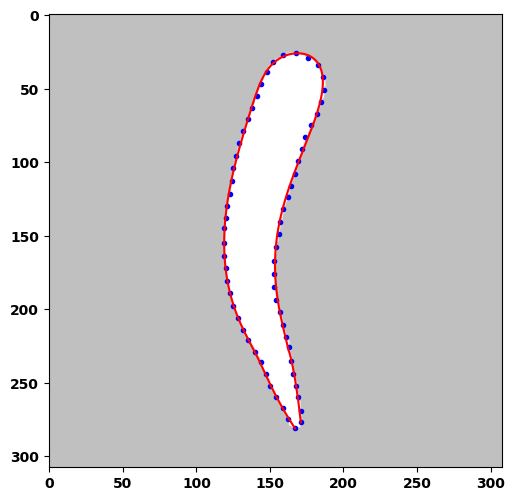

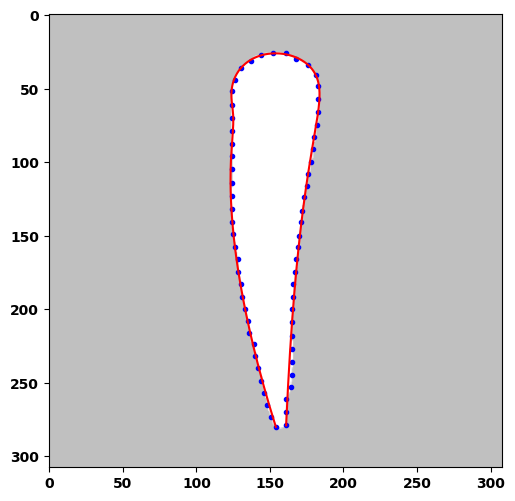

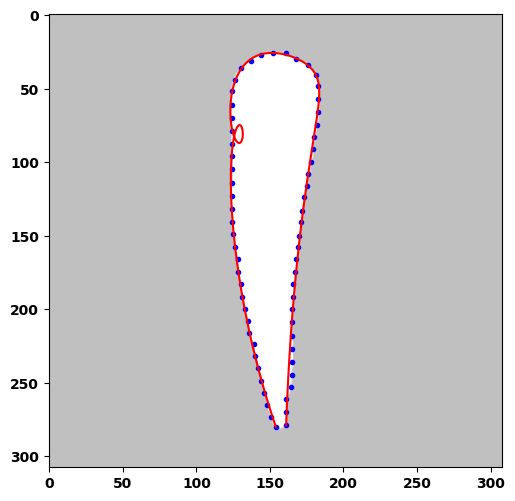

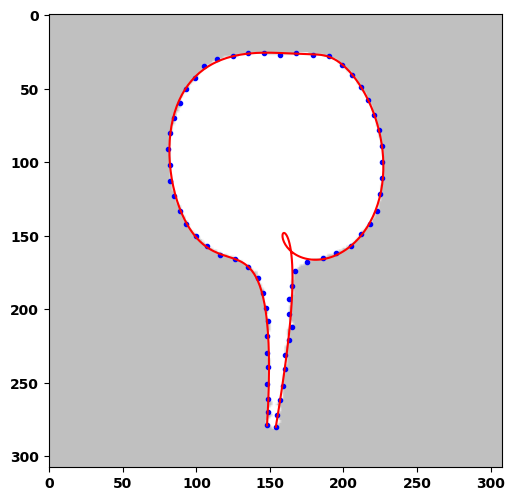

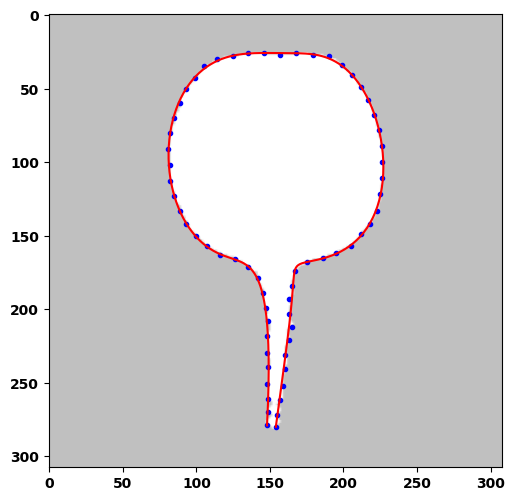

In [11]:
#### rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 30000 # dummy
Ims =[2, 3,3,4, 4]
Ns =[11,7,8,11,12]
erth = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode0',mode=0,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=3000,pat=3000,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

2022-02-17 21:39:04.096062


loss,▅▃▂▂▂▂▂▂▂▂▂▂▂▇▂█▂▂▃▂▂▁▁▁▂▁▂▂▁▄▁▁▁▁▁▁▇▁▁▁
loss,0.49598


^^^^^^^.^^^^.^.
CP 5.0, steps:14, etime: 6.79337 err: 3.4645052170
^^^^.^^.^^.^^.^........................^^^^^^^^^^^^^^^^^^^...^^.....................^
^^^^^^^^^^^.^^.................................^^^^^^^^^^^^^..^..^............................
CP 2.0, steps:193, etime: 39.04181 err: 1.9985706215
......
..^^^^^^^^^^^^^^^.^...^.......................................^^^^^^^^^^^^^^^^......................
........................^^^^^^^^^^^^^^^^^...^.^..............................................^^^^^^^
^^^^^^^^^^^^^.....^.............................................^^^^^^^^^^^^^^^^^^^^^^.^.^.^^^.^^..^
......^.^.^...........^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^..^.^.^.^.^^.^.^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^.^.^.^^^^^^^^.^.^.^^^^^^^^^^.^.^.^.^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..^.^.^^.^.^^.^.^.^..^.^.^..^^^.
^.^.^..^.^.^.^.^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

loss,▂▂▂▂▂▂▂▅█▂▂▂▁▁▂▁▃▁▂▃▁▁▁▂▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁
loss,1.18564


^^^^^^^^^^^^^^.
CP 5.0, steps:14, etime: 8.49499 err: 4.7665371113
^.^^.^^.^..^.........................................................................
....................................................................................................
.........................
CP 2.0, steps:224, etime: 54.03197 err: 1.9966383515
...........................................................................
......^^^^^^^^^^^^^^.^.^.^...........................................^^^^^^^^^^^^^^^................
.....................................^^^^^^^^^^^^^^^^^^^....^.^.^.^.^.^.............................
.............^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^.^.^.^.^^^^^^^^.^.^^^^^^^^.^.^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^.^.^.^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^.^.
^.
CP 1.0, steps:701, etime: 154.20775 err: 0.9943188297
^.^^^.^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
.^^...^.^.^.^.^.^.^.^.^.^.^.^.^

loss,█▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▄▂▁▁▁▁▂▅▂▅▁▂▁▁▁▂▁▂▂▃▁
loss,0.4983


^^^^^^^^^^^^^^^
CP 5.0, steps:14, etime: 8.65294 err: 4.1389078022
^.^^^^.
CP 2.0, steps:21, etime: 10.25733 err: 1.7915355251
^..^..^.......................................................................
........................................................................................^^^^^^^^^^^^
^^^^^^^^^^^^^^^...^^....^^...^^....^^....^^.^^^^^^^.^^^...^^^^................
CP 1.0, steps:277, etime: 69.63586 err: 0.9984560947
..................^.^^
^^^^^^^^^^.^....^.......................................^^^^^^^^^^^.^..^.^..........................
......^^^^^^^^^^^.^^^^^^^^^^^^^^.^^.^.....^.
CP 0.65, steps:443, etime: 107.07726 err: 0.6456451589
^.^.^.^.^^^^^^^^^^^^^^^^^^^^^^^^........^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^.^.^.^.^^^
^^^^^^^^^^^.^.E

Matrix([[156.0*t**11 + 182.585*t**10*(11 - 11*t) + 4613.87*t**9*(1 - t)**2 + 163566.0*t**8*(1 - t)**3 - 637266.0*t**7*(1 - t)**4 + 1.76973e+6*t**6*(1 - t)**5 - 1.

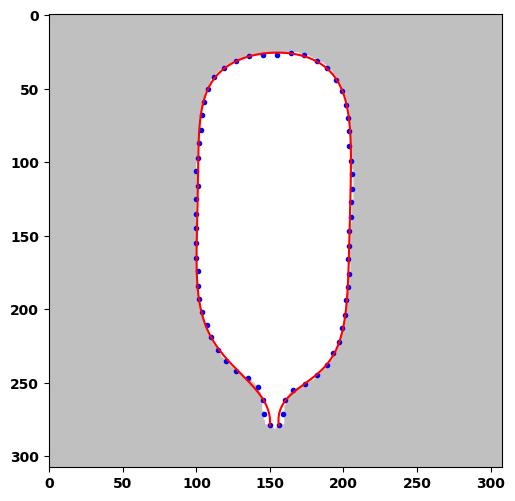

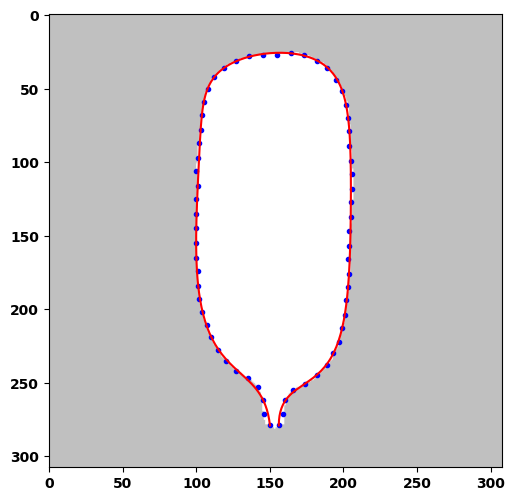

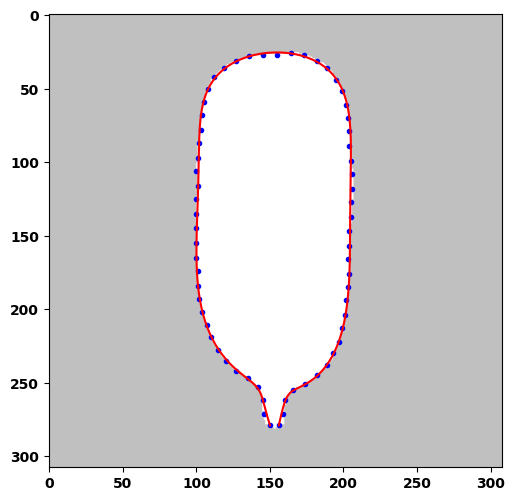

In [12]:
#### rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 30000 # dummy
Ims =[5, 5, 5]
Ns =[9,10,11,12,7,8,9]
erth = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode0',mode=0,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=3000,pat=3000,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

2022-02-17 21:56:27.984802


loss,█▂▁▁▁▁▁▁▁▁▁▁▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.48453


^^^^^^^^^^^^^^^^.
CP 5.0, steps:16, etime: 9.88535 err: 4.1142056133
^^.^.^^..........................^^..^^^...................^^...^^^................
...^^...^^^...........
CP 2.0, steps:121, etime: 36.83902 err: 1.9948842789
.........^^^^..^^^.^^^....................^^^^..^^..........................^^
^^^^.^^^^^^^.^.^....................^^^^^^^^^^^..............^^^^^^^^^^.
CP 1.0, steps:271, etime: 75.70728 err: 0.9857248579
^..^.^^^^^^^^^^^^...........
...............^^^^^^^^^^^^^^^^^^^^^^^^^^.............................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^............
CP 0.65, steps:447, etime: 121.32466 err: 0.6499550358
.......^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^^^^.^^^.^^^^^.^^^^^^^^.^^^^..^^^^^.^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.
^.^^^^^^^^^^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

loss,▅▃▃▂▂▅▁▁▆▁▂▃▂█▂▃▂▃▂▃▁▄▂▁▂▄▁▁█▃▄▁▂▃▃▁▁▅▃▁
loss,1.98073


^^^.^.^.^.^.
CP 5.0, steps:11, etime: 4.13766 err: 3.7434532931
^..^.
CP 2.0, steps:16, etime: 4.79442 err: 1.5104654656
^^.^^.^..^..^......................
CP 1.0, steps:51, etime: 9.40727 err: 0.9969614963
....................^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^.^^^^^^.^^.^^^^^^.^^^^^^.^^^.^^....................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^.^^.^^..^^..^...................................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^.
CP 0.65, steps:321, etime: 46.12990 err: 0.6494036261
^^.^^.^^^^^^^^^^^^^^^^^^^^^.^^^.^^..^.........................................
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.............^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^........................................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^...............
......................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

loss,▁▃▁▁▁▁▅▁▁▁█▁▁▁▂▂▂▂▂▂▂▂▅▂▂▂▂▂▂▂▂▂▂▂▃▂▂▂▂▂
loss,2.38029


^^^^^^^^^......
CP 5.0, steps:14, etime: 5.52182 err: 4.9647823606
^....^..^........
CP 2.0, steps:31, etime: 8.06948 err: 1.9915908437
.............................................................^^^^^^^
^^^^^^....................^^^^^^^.^^^........................^^^^^^.^^^..^......................^^^^
^^^.^^..^^.....
CP 1.0, steps:214, etime: 36.77498 err: 0.9989999204
.................^^^^^^^^^^^..^^^^.......................^^^^^^^^^^^^..^^^^^........^
................^^^^^^^^^^^^^^^^^^^^^...
CP 0.65, steps:339, etime: 55.63929 err: 0.6367832774
....^......................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^.^.^.........................^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^.^..E

Matrix([[161.0*t**8 + 127.322*t**7*(8 - 8*t) + 4417.13*t**6*(1 - t)**2 - 2238.56*t**5*(1 - t)**3 + 16019.1*t**4*(1 - t)**4 + 13528.7*t**3*(1 - t)**5 + 5302.3*t**2*(1 - t)**6 + 1352.73*t*(1 - t)**7 + 168.0*(1 - t)**8], [281.0*t**8 + 231.613*t**7*(8 - 8*t) + 4694.41*t**6*(1 - t)**2 + 29552.8*t**5*(1 - t)**

loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.49933


^^^^^^^^^.^.^.^..
CP 5.0, steps:16, etime: 7.14254 err: 4.4827218514
^.^^.^..^..........................................................................
............................................................................^^^^^^^^^^^^^...........
............................^^^^^^^^^^^^^^^.
CP 2.0, steps:243, etime: 48.44819 err: 1.9571704209
.^^..........^^^^^^^^^^^.^^.^^^^^^^^^^^^^^...^^^^.......
..............^^^^^^^^^^^^^^....^^^^...........^^^^^^^^^^^^^^^^^^^^^^.....^^^^...................^^^
^^^^^^^^^......^^...................^^^^^^^^^^^^^^^.^.^.^.^.........................................
...............^^^^^^^^^^.^^^^^^.^.^..^.^..................
CP 1.0, steps:558, etime: 104.99250 err: 0.9996051618
................................^^^^^^^^^
^^^^^^.^^^^^^...^.^.^.^.^.^.^.^.^.^.^.^.^.^.^.^.^.^..^.^.^.^.^.^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^.^^^.^^^.^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

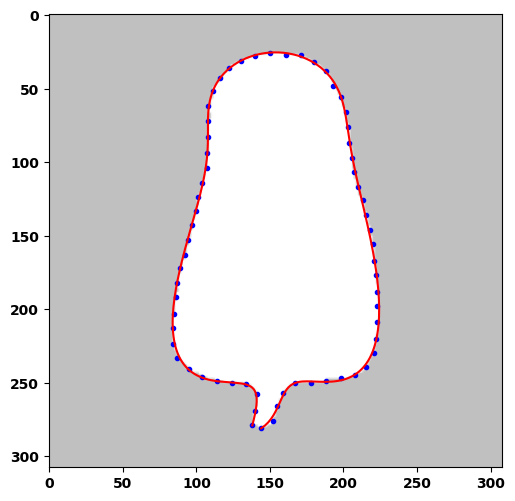

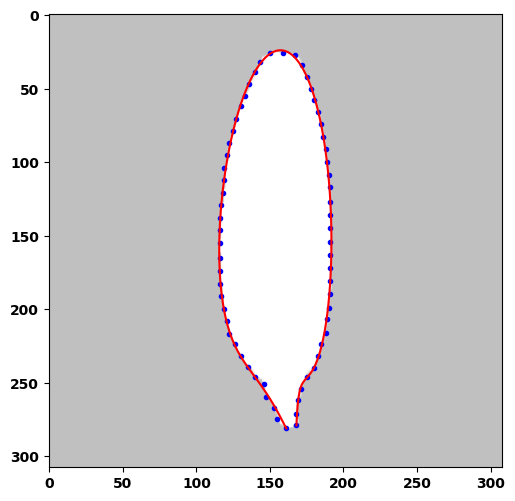

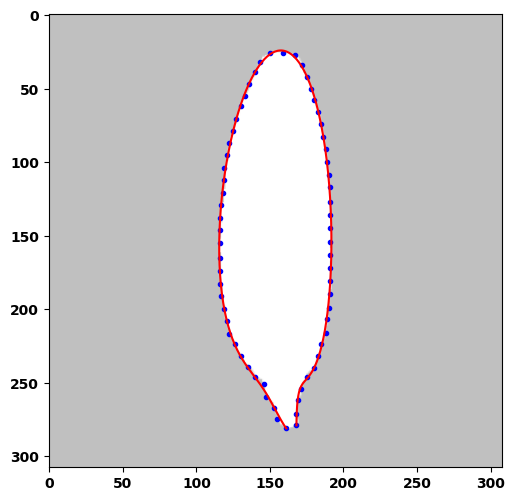

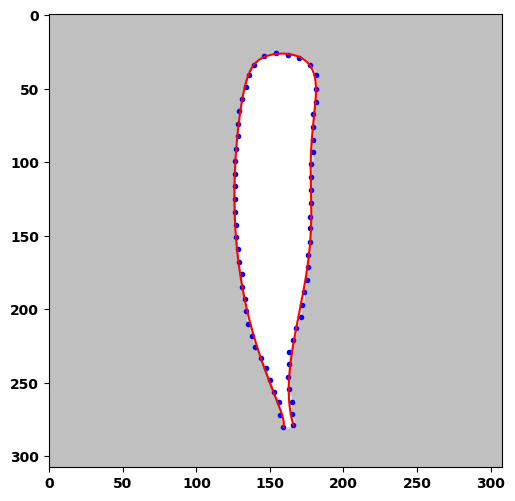

In [13]:
#### rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 30000 # dummy
Ims =[6,7,7,8]
Ns =[12,7,8,9]
erth = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode0',mode=0,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=3000,pat=3000,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

In [ ]:
#### rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 30000 # dummy
Ims =[2, 3,3,4, 4,  5, 5, 5, 6,7,7,8]
Ns =[7,10,11,12,11,7,8,11,12, 9,10,11,12,7,8,9]
erth = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode0',mode=0,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=3000,pat=3000,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

2022-02-17 14:35:31.480025


wandb: Currently logged in as: aquapathos (use `wandb login --relogin` to force relogin)


..
CP 5.0, steps:1, etime: 3.54744 err: 4.5798364657
............................................................
CP 2.0, steps:61, etime: 81.79733 err: 1.9910238924
......................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.........................................................................................
CP 1.0, steps:588, etime: 778.58926 err: 0.9997308164
...........
....................................................................................................
....................................................................................................
.................................

loss,█▆▄▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.78744


...
CP 5.0, steps:2, etime: 5.61226 err: 4.7900878085
................................
CP 2.0, steps:34, etime: 55.13336 err: 1.9715516809
......................................................
CP 1.0, steps:88, etime: 139.02927 err: 0.9917218543
...........
..............................................................................
CP 0.65, steps:177, etime: 282.03864 err: 0.6493236780
......................
....................................................................................................
....................................................E

Matrix([[154.0*t**10 + 127.389725017911*t**9*(10 - 10*t) + 7231.53200562573*t**8*(1 - t)**2 + 1184.80910073221*t**7*(1 - t)**3 + 89991.3476347497*t**6*(1 - t)**4 - 146424.23259657*t**5*(1 - t)**5 + 225696.603221085*t**4*(1 - t)**6 - 38470.8796116422*t**3*(1 - t)**7 + 13952.6445882155*t**2*(1 - t)**8 + 1464.31706922189*t*(1 - t)**9 + 161.0*(1 - t)**10], [280.0*t**10 + 250.237332078709*t**9*(10 - 10*t) - 3351.58564149593*t**8*

loss,█▆▅▄▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.49994


...........
CP 5.0, steps:10, etime: 21.86358 err: 4.9089459791
.........................................................................................
...........................
CP 2.0, steps:126, etime: 236.35190 err: 1.9972432324
.........................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
............................................
CP 1.0, steps:743, etime: 1358.37603 err: 0.9987621014
........................................................
............................

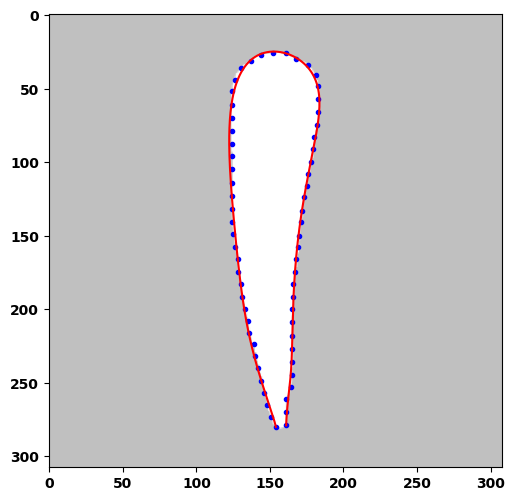

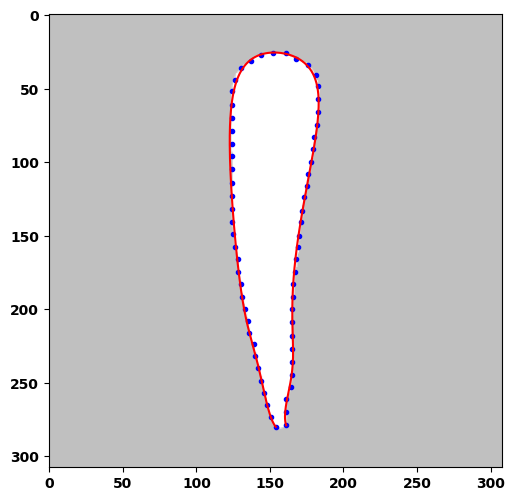

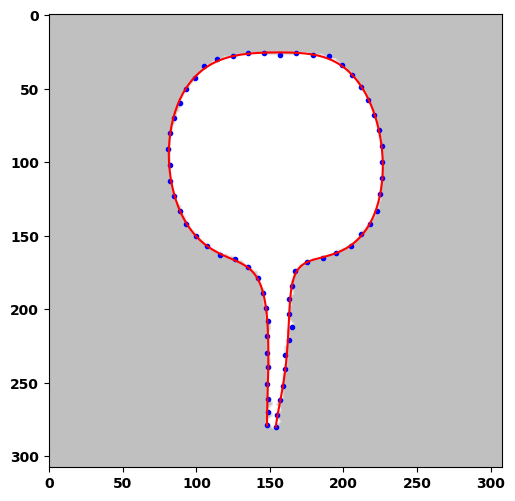

In [5]:
##### rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

Ims =[3,3,4]
Ns =[9,10,11,9,12,7,8,9]
erth = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1(Ims[i],test='fit1',coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,maxTry=3000,pat=3000,err_th=erth[i],withEC=True,threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

2022-02-17 17:02:50.102429


loss,█▅▅▄▄▄▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.55943


.
CP 5.0, steps:0, etime: 3.48800 err: 3.2307638368
.......................
CP 2.0, steps:23, etime: 52.17061 err: 1.9832761699
..............................................................
CP 1.0, steps:85, etime: 183.82747 err: 0.9931485177
..............
......................................................................................
CP 0.65, steps:185, etime: 396.40030 err: 0.6485182889
..............
..........................................................^......................................^^.
.....^...^^................................................................^^^^..^^^^..^^^^^^.......
....................................................................................................
....................................................................................................
.......^^..^^^^^^^^^^^^^^^^^^^^^^^...........................^^.....^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^............................................................................

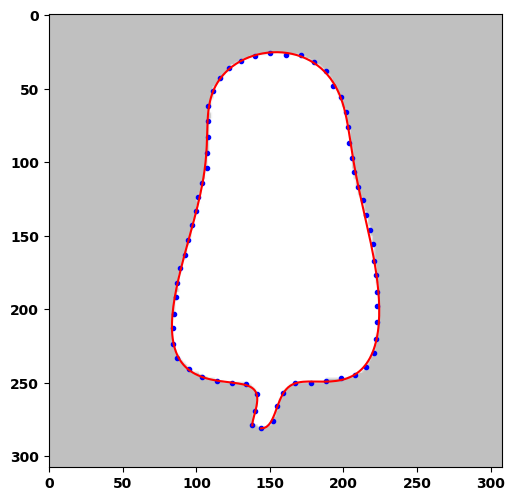

In [6]:
rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

Ims =[6]
Ns =[12]
erth = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1(Ims[i],test='fit1',coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,maxTry=3000,pat=3000,err_th=erth[i],withEC=True,threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

334


In [ ]:
##### rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

Ims =[3,3,3,4]
Ns =[8,9,10,11,9,12,7,8,9]
erth = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1(Ims[i],test='fit1',coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,maxTry=3000,pat=3000,err_th=erth[i],withEC=True,threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

2022-02-17 05:56:06.031890


loss,█▅▅▄▄▄▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.55943


.
CP 5.0, steps:0, etime: 2.05307 err: 3.6319228902
.............................
CP 2.0, steps:29, etime: 40.12172 err: 1.9884173238
......................................................................
....................................................................................................
.............
CP 1.0, steps:212, etime: 280.73774 err: 0.9997826914
.......................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................
CP 0.65, steps:657, etime: 885.61993 err: 0.6498842590
..........................................
.............................................................................^

loss,█▆▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.63133


.
CP 5.0, steps:0, etime: 3.47007 err: 3.2307638368
.......................
CP 2.0, steps:23, etime: 51.41500 err: 1.9832761699
..............................................................
CP 1.0, steps:85, etime: 181.70457 err: 0.9931485177
..............
......................................................................................
CP 0.65, steps:185, etime: 393.92540 err: 0.6485182889
..............
..........................................................^......................................^^.
.....^...^^................................................................^^^^..^^^^..^^^^^^.......
....................................................................................................
....................................................................................................
.......^^..^^^^^^^^^^^^^^^^^^^^^^^...........................^^.....^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^............................................................................

loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.51538


...
CP 5.0, steps:2, etime: 3.02378 err: 2.8873477505
.
CP 2.0, steps:3, etime: 3.88549 err: 1.8986485062
......
CP 1.0, steps:9, etime: 8.96874 err: 0.9757345386
..........................................................................................
..........................................................^^........................................
....................................................................................................
...................^^^^^^^^^^^^^^^^^^^^^^^^^^^^........................^^^^^^^......................
....................................................................................................
....................................................................................................
...................................................................................................^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

loss,█▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.68973


...
CP 5.0, steps:2, etime: 3.78536 err: 3.6938013527
......
CP 2.0, steps:8, etime: 10.12297 err: 1.9080258285
................
CP 1.0, steps:24, etime: 27.02578 err: 0.9987030345
...........................................................................
...........................^^^^^^^^^^^^..............................................
CP 0.65, steps:184, etime: 201.52359 err: 0.6498859971
...............
....................................................................................................
..............................................................^^^^^.^^^^^^^^^^.^^^^^^^^^..^^^^.^^^^.
^^^..^^^^^.^^^..^^^^..^^^^..^^^^..^^^^..^^^^^..^^^^..^^^^^..^^^^^..^^^^..^^^^^..^^^^^..^^^^^..^^^^^.
.^^^^^..^^^^^..^^^^^..^^^^^..^^^^^..^^^^^..^^^^^..^^^^^..^^^^^^.^^^^^^^.^^^^^..^^^^^..^^^^^^.^^^^^^.
^^^^^^^.^^^^^..^^^^^^.^^^^^^.^^^^^^^.^^^^^..^^^^^^.^^^^^^^.^^^^^^.^^^^^^.^^^^^^^.^^^^^^.^^^^^^^.^^^^
^..^^^^^^.^^^^^^^.^^^^^^.^^^^^^^.^^^^^^.^^^^^^^.^^^^^^.^^^^^^^.^^^^^^.^^^^^^^.^^^

loss,█▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.61542


..
CP 5.0, steps:1, etime: 3.39666 err: 4.8483622978
........................................................................
CP 2.0, steps:73, etime: 97.56798 err: 1.9925564611
..........................
....................................................................................................
....................................................................................................
....................................................................................................
............................................................................
CP 1.0, steps:475, etime: 626.53956 err: 0.9999157206
........................
....................................................................................................
....................................................................................................
....................................................................................................
.................................

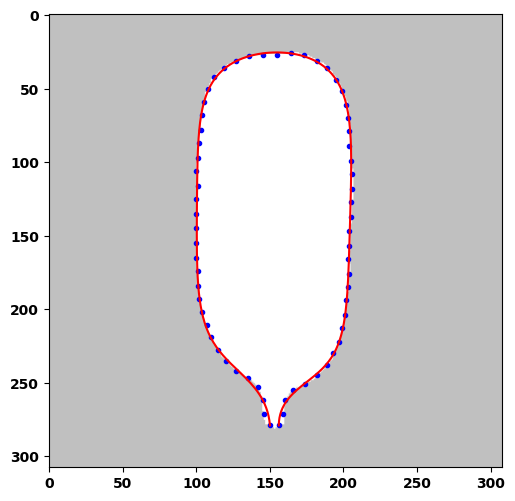

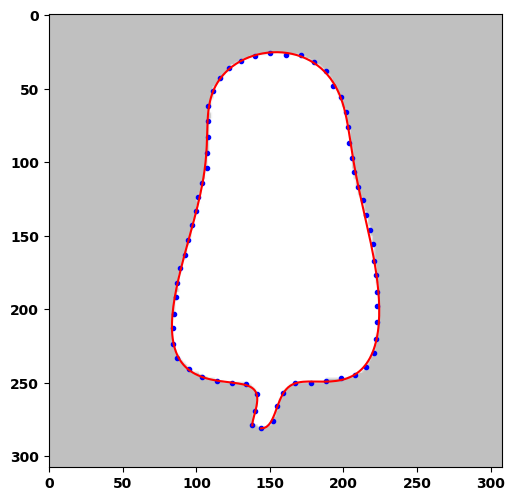

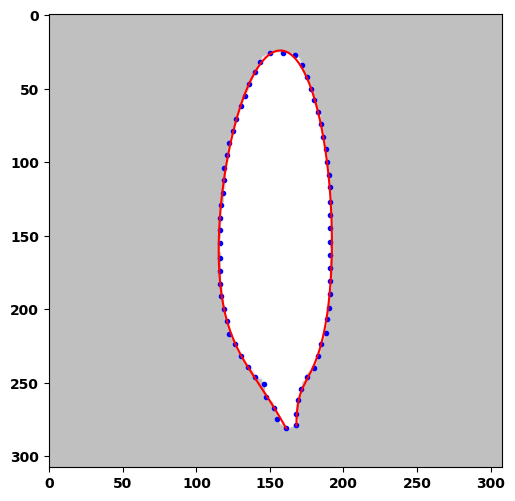

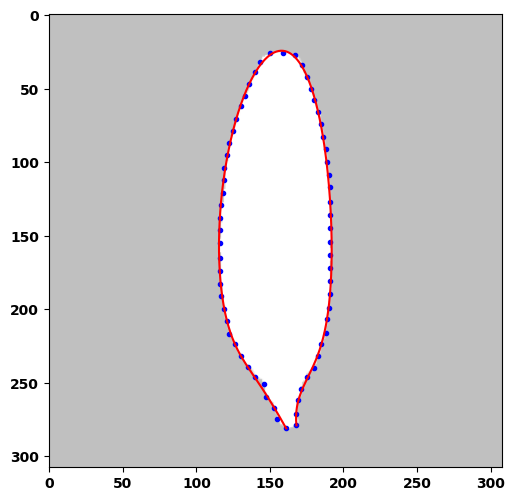

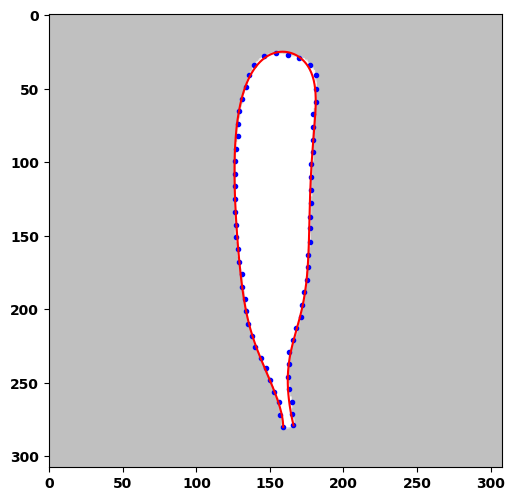

In [8]:
rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

Ims =[5,6,7,7,8]
Ns =[9,12,7,8,9]
erth = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1(Ims[i],test='fit1',coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,maxTry=3000,pat=3000,err_th=erth[i],withEC=True,threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

In [4]:
wandb.login()

wandb: Currently logged in as: aquapathos (use `wandb login --relogin` to force relogin)


True

# fit1T mode 1

2022-03-16 17:33:35.360411


loss,█▆▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.59257


....
CP 5.0, steps:3, etime: 8.28125 err: 4.9350461717
......................................................................................
CP 2.0, steps:89, etime: 95.89062 err: 1.9908536546
..........
....................................................................................................
........
CP 1.0, steps:207, etime: 216.65625 err: 0.9968218795
............................................................................................
..............................................
CP 0.65, steps:345, etime: 358.01562 err: 0.6499508977
......................................................
....................................................................................................
...........................................................................................^.^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..^^^^^^^^^^^^^^^^^...^^.^^^^^^^^^^

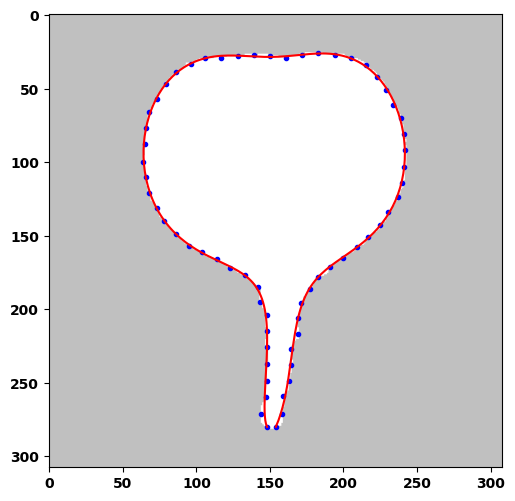

In [6]:
#### rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 30000 # dummy
#Ims =[0,1,2]
Ims =[1]
#Ns =[7,10,11,10,11,9,12,7,9]
Ns =[10,11,10,11,9,12,7,9]
erth = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode1',mode=1,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=3000,pat=3000,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

2022-02-17 22:33:51.543980


loss,▆▅▄▃▃▃▂▂▂▁▁▃▁▁▁▁▁▂▁▁▁▂█▂▃▃▃▄▄▄▄▄▄▄▄▄▄▄▄▅
loss,2.32395


....................................................................................................
.
CP 5.0, steps:100, etime: 53.63557 err: 4.8904184236
................................
CP 2.0, steps:132, etime: 69.56028 err: 1.9633035335
............................
CP 1.0, steps:160, etime: 83.50408 err: 0.9987380084
...............................
CP 0.65, steps:191, etime: 98.94929 err: 0.6482304178
........
....................................................................................................
....................................................................................................
.............^^^^^^^^^.^^^^^^.^.^^^^.^..^^..C

Matrix([[156.0*t**7 + 485.831837007755*t**6*(7 - 7*t) - 12044.456155422*t**5*(1 - t)**2 + 50778.9678213651*t**4*(1 - t)**3 - 38946.6427863343*t**3*(1 - t)**4 + 17410.0892835273*t**2*(1 - t)**5 - 1128.48420594141*t*(1 - t)**6 + 149.0*(1 - t)**7], [281.0*t**7 + 195.974888465393*t**6*(7 - 7*t) + 619.024564666036*t**5*(1 - t)**2 - 419

loss,█▅▄▄▄▃▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.51372


.....
CP 5.0, steps:4, etime: 10.17738 err: 4.7634964544
......................................................................
CP 2.0, steps:74, etime: 82.27759 err: 1.9936764963
.........................
.............................................................
CP 1.0, steps:160, etime: 171.19360 err: 0.9929970403
.......................................
.......................
CP 0.65, steps:222, etime: 236.64799 err: 0.6487010214
.............................................................................
.......................................E

Matrix([[154.0*t**10 + 200.829643512917*t**9*(10 - 10*t) + 1520.07575514224*t**8*(1 - t)**2 + 92771.3257423372*t**7*(1 - t)**3 - 10197.7699343697*t**6*(1 - t)**4 - 62475.1918127806*t**5*(1 - t)**5 + 207396.873967659*t**4*(1 - t)**6 - 99068.2526073182*t**3*(1 - t)**7 + 17521.4681433626*t**2*(1 - t)**8 + 1206.39202151629*t*(1 - t)**9 + 147.0*(1 - t)**10], [280.0*t**10 + 247.950916823025*t**9*(10 - 10*t) - 26035.0984384929*t**8*(1 - t)**2

loss,█▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.49985


..
CP 5.0, steps:1, etime: 7.58452 err: 3.2957069130
...
CP 2.0, steps:4, etime: 11.24888 err: 1.8521162678
...............
CP 1.0, steps:19, etime: 29.51310 err: 0.9879633344
................................................................................
...........
CP 0.65, steps:110, etime: 140.31144 err: 0.6496358336
.........................................................................................
....................................................................................................
..............E

Matrix([[167.0*t**11 + 149.204021745709*t**10*(11 - 11*t) + 11872.1108723922*t**9*(1 - t)**2 - 60590.2741663642*t**8*(1 - t)**3 + 389398.032579106*t**7*(1 - t)**4 - 700066.718195268*t**6*(1 - t)**5 + 876139.089686325*t**5*(1 - t)**6 - 243073.365111719*t**4*(1 - t)**7 + 71286.5494913935*t**3*(1 - t)**8 + 4511.62630234181*t**2*(1 - t)**9 + 1844.28887671239*t*(1 - t)**10 + 171.0*(1 - t)**11], [281.0*t**11 + 254.452808752449*t**10*(11 - 11*t) + 23625.3636702759*t**9*(

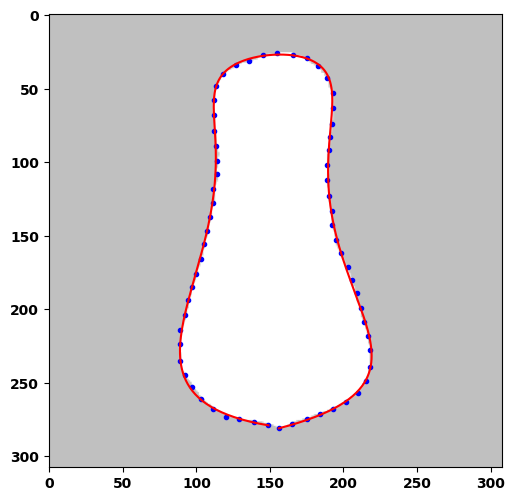

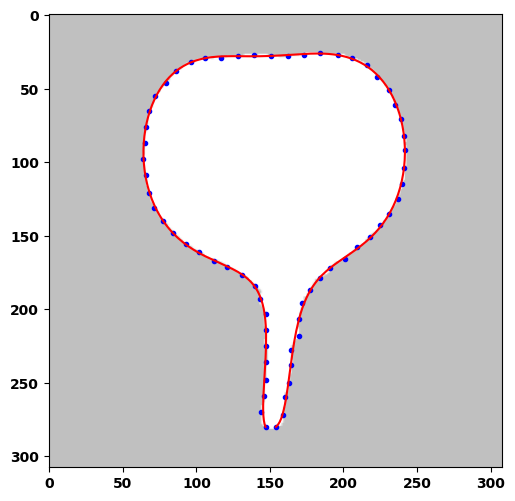

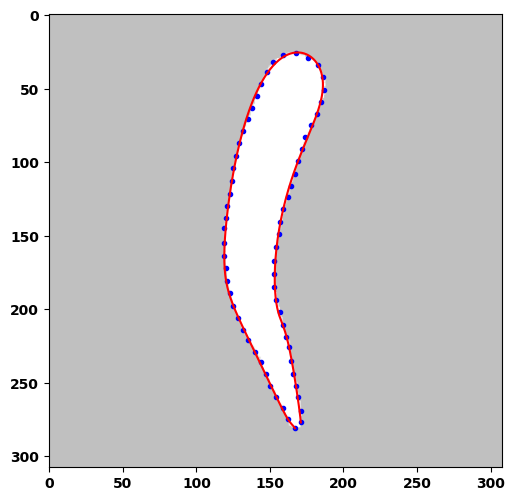

In [14]:
#### rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 30000 # dummy
Ims =[0,1,2]
Ns =[7,10,11,10,11,9,12,7,9]
erth = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode1',mode=1,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=3000,pat=3000,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

2022-03-16 12:35:54.569564


wandb: Currently logged in as: aquapathos (use `wandb login --relogin` to force relogin)


....
CP 5.0, steps:3, etime: 8.57812 err: 4.9350461717
......................................................................................
CP 2.0, steps:89, etime: 98.70312 err: 1.9908536546
..........
....................................................................................................
........
CP 1.0, steps:207, etime: 223.93750 err: 0.9968218795
............................................................................................
..............................................
CP 0.65, steps:345, etime: 370.45312 err: 0.6499508977
......................................................
....................................................................................................
...........................................................................................^.^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^..^^^^^^^^^^^^^^^^^...^^.^^^^^^^^^^

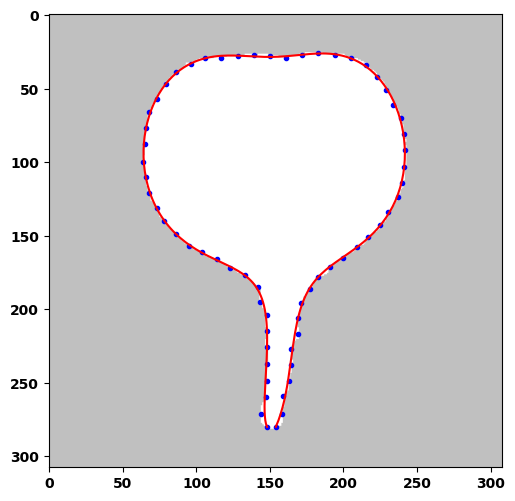

In [5]:
#### rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 30000 # dummy
Ims =[1]
Ns =[10]
erth = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode1',mode=1,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=3000,pat=3000,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

2022-02-17 22:50:29.537397


loss,█▆▄▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.49961


....
CP 5.0, steps:3, etime: 9.16908 err: 4.9023470064
.................
CP 2.0, steps:20, etime: 26.34463 err: 1.9633409616
...................
CP 1.0, steps:39, etime: 45.51787 err: 0.9752772595
.................
CP 0.65, steps:56, etime: 62.70490 err: 0.6426375381
.......................E

Matrix([[154.0*t**10 + 128.221255240952*t**9*(10 - 10*t) + 4163.99735108391*t**8*(1 - t)**2 + 33161.9122971754*t**7*(1 - t)**3 - 15105.502364103*t**6*(1 - t)**4 - 6014.45271867402*t**5*(1 - t)**5 + 149276.7382822*t**4*(1 - t)**6 - 21046.186687698*t**3*(1 - t)**7 + 12112.9052801125*t**2*(1 - t)**8 + 1540.88229432151*t*(1 - t)**9 + 161.0*(1 - t)**10], [280.0*t**10 + 261.209482209565*t**9*(10 - 10*t) - 17707.0256851656*t**8*(1 - t)**2 + 269625.453222091*t**7*(1 - t)**3 - 783772.711654908*t**6*(1 - t)**4 + 987037.445331185*t**5*(1 - t)**5 - 581533.621121145*t**4*(1 - t)**6 + 147585.541301407*t**3*(1 - t)**7 - 263.581873331525*t**2*(1 - t)**8 + 2247.34981503246*t*(1 - t)**9 + 279.0*(1 - t)**10]])
img 3

loss,█▆▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.4977


.........
CP 5.0, steps:8, etime: 16.09640 err: 4.8355238879
.............................................
CP 2.0, steps:53, etime: 70.90568 err: 1.9980713601
..............................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.........................
CP 1.0, steps:524, etime: 651.78494 err: 0.9988864465
...........................................................................
...........................................................
CP 0.65, steps:658, etime: 816.84772 err: 0.6496506150
.........................................
............................^^..........E

Matrix([[154.0*t**11 + 162.0514912

loss,█▅▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
loss,0.49995


.
CP 5.0, steps:0, etime: 4.88549 err: 4.5050444361
..................
CP 2.0, steps:18, etime: 19.70576 err: 1.9736223638
.................................................................................
.
CP 1.0, steps:100, etime: 88.41505 err: 0.9962659943
...........................................................................
CP 0.65, steps:175, etime: 149.92297 err: 0.6485737440
........................
......................................................E

Matrix([[156.0*t**9 + 169.414823907909*t**8*(9 - 9*t) + 14420.0226542017*t**7*(1 - t)**2 - 24096.830567144*t**6*(1 - t)**3 + 138811.546030668*t**5*(1 - t)**4 - 103259.913676266*t**4*(1 - t)**5 + 53530.4622284265*t**3*(1 - t)**6 - 4148.59846597271*t**2*(1 - t)**7 + 1176.70019747013*t*(1 - t)**8 + 150.0*(1 - t)**9], [279.0*t**9 + 150.466575184645*t**8*(9 - 9*t) + 19433.3042187134*t**7*(1 - t)**2 - 43739.0475846852*t**6*(1 - t)**3 + 24567.8536164787*t**5*(1 - t)**4 + 35037.1281306688*t**4*(1 - t)**5 - 43221.2372163923*t**3*(

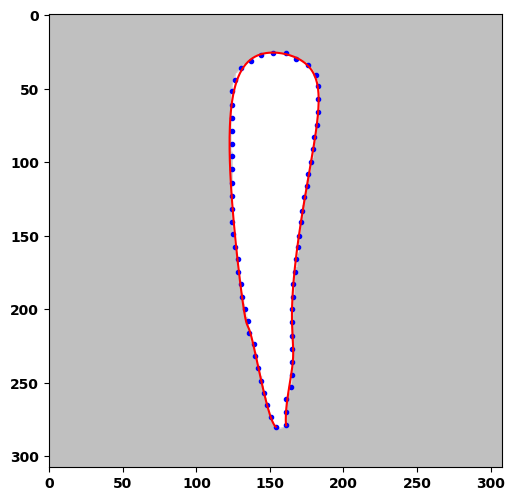

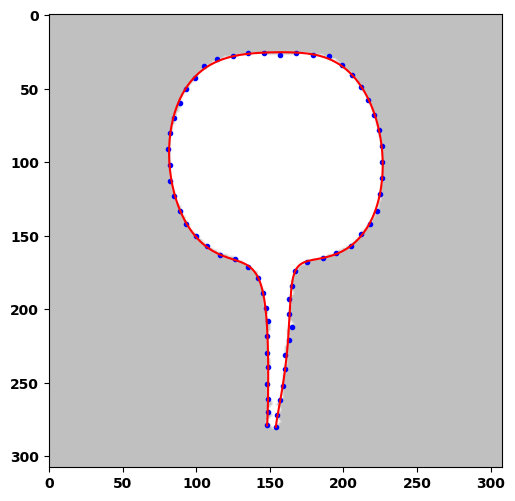

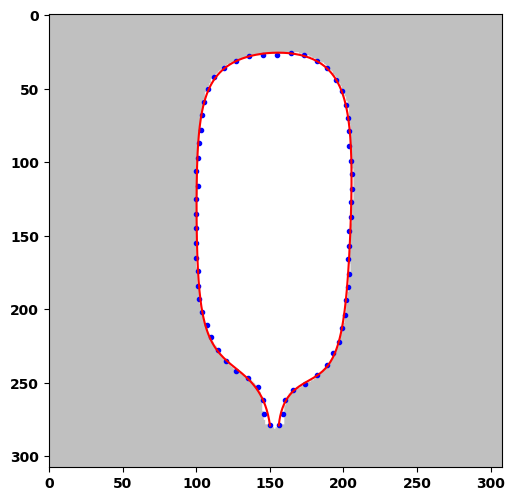

In [15]:
#### rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 30000 # dummy
Ims =[3,4,5]
Ns =[10,11,9,12,7,9]
erth = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode1',mode=1,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=3000,pat=3000,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))

2022-02-17 23:11:13.143563


loss,█▆▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.49884


.
CP 5.0, steps:0, etime: 6.79422 err: 3.4418080953
...........
CP 2.0, steps:11, etime: 22.73100 err: 1.9582550498
...........................
CP 1.0, steps:38, etime: 61.85205 err: 0.9822329371
...........................
CP 0.65, steps:65, etime: 101.13037 err: 0.6450529537
..................................
.............E

Matrix([[144.0*t**12 + 213.119945745099*t**11*(12 - 12*t) - 5763.86999066485*t**10*(1 - t)**2 + 261758.193121319*t**9*(1 - t)**3 - 381588.526321133*t**8*(1 - t)**4 - 419043.542954778*t**7*(1 - t)**5 + 3574431.9788191*t**6*(1 - t)**6 - 4172686.84924937*t**5*(1 - t)**7 + 2155607.19240755*t**4*(1 - t)**8 - 401219.077144628*t**3*(1 - t)**9 + 29189.1327584491*t**2*(1 - t)**10 + 1558.3977703254*t*(1 - t)**11 + 138.0*(1 - t)**12], [281.0*t**12 + 269.388097561614*t**11*(12 - 12*t) - 13890.4246099679*t**10*(1 - t)**2 + 501262.610469898*t**9*(1 - t)**3 - 2360823.88835829*t**8*(1 - t)**4 + 5927560.71142612*t**7*(1 - t)**5 - 7973217.65935526*t**6*(1 - t)**6 + 5796447.7409908

loss,█▆▅▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.4994


....
CP 5.0, steps:3, etime: 4.49133 err: 3.9208816525
..
CP 2.0, steps:5, etime: 5.52134 err: 1.9794736178
....
CP 1.0, steps:9, etime: 7.57468 err: 0.9990815651
.^^^......................................................................................
.....................
CP 0.65, steps:120, etime: 65.10863 err: 0.6496121285
...............................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.....................................................^..............................................
....................................^^^.^............................................

loss,█▆▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.5


....
CP 5.0, steps:3, etime: 7.25601 err: 4.1556517777
..................................
CP 2.0, steps:37, etime: 35.18516 err: 1.9755310710
..............................................................
....................................................................................................
....................
CP 1.0, steps:219, etime: 185.80432 err: 0.9979349639
................................................................................
...............................................................................
CP 0.65, steps:378, etime: 318.57308 err: 0.6483292032
.....................
............................................................................E

Matrix([[159.0*t**9 + 122.627471532918*t**8*(9 - 9*t) + 5447.45281610528*t**7*(1 - t)**2 + 14354.8523535528*t**6*(1 - t)**3 - 24611.4940911545*t**5*(1 - t)**4 + 85236.9931122839*t**4*(1 - t)**5 - 12575.5531725101*t**3*(1 - t)**6 + 11753.7537018244*t**2*(1 - t)**7 + 1184.61704264367*t*(1 - t)**8 + 166.

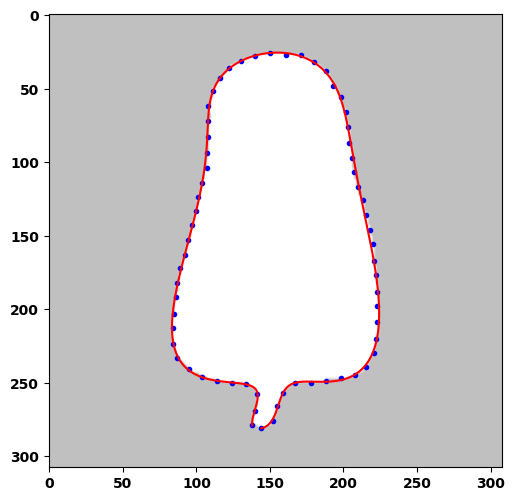

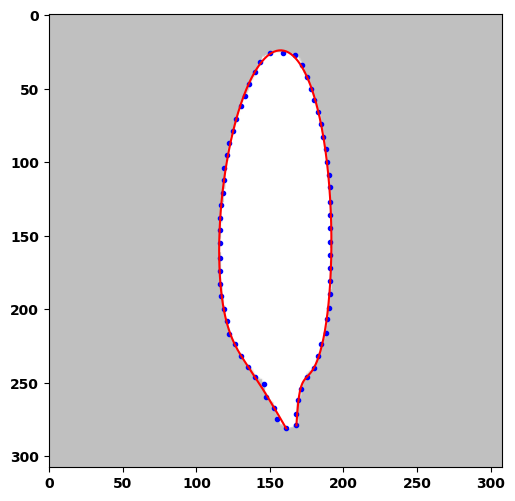

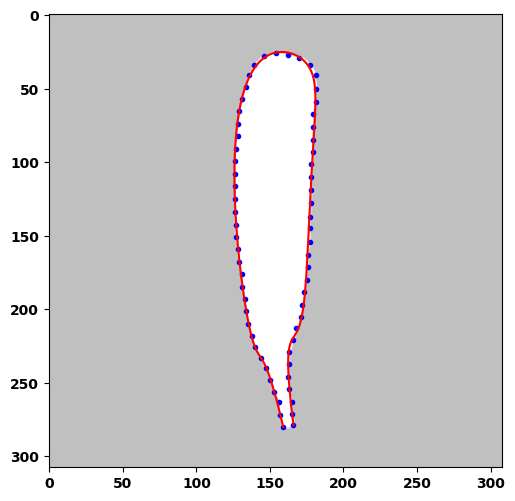

In [16]:
#### rd.BezierCurve.debugmode=False
rd.BezierCurve.convg_coe = 1e-5

lr = 0.001
lrP = 30000 # dummy
Ims =[6,7,8]
Ns =[12,7,9]
erth = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
for i in range(len(Ims)):
    print(datetime.datetime.now())
    err,etime,count = check1T(Ims[i],test='fit1Tmode1',mode=1,coe=Ns[i],Nsamples=65,N=Ns[i],itt=3,withEC=True,lr=lr,lrP=lrP,maxTry=3000,pat=3000,err_th=erth[i],threstune=1.0,wandb=wandb,trial=None)
    print('img %d: err_th: %f, steps:%d, minerror: %1.10f, etime: %3.5f' % (Ims[i], erth[i], count,err, etime))